# 연습문제 (T-Test)

## 문제 1

당신은 매일 아침 동네 빵집에서 식빵을 구입해 왔다.

이 식빵의 무게는 `500g`이라고 표시되어 있다. 하지만 당신은 자신이 구매하는 빵이 `500g`이 맞는지 의구심이 들기 시작한다. 그래서 1개월간 식빵을 사운 뒤 매일 무게를 기록하였고 그 결과는 아래의 데이터와 같다.

| 무게  | 무게  | 무게  | 무게  | 무게  |
|-----|-----|-----|-----|-----|
| 482 | 477 | 477 | 478 | 481 |
| 479 | 482 | 479 | 480 | 484 |
| 485 | 480 | 476 | 480 | 480 |
| 474 | 480 | 481 | 477 | 482 |
| 479 | 483 | 476 | 479 | 483 |

25일간 측정한 빵의 평균 무게는 `480g`이었다. 이 값을 가지고 식빵의 무게가 500g이 되지 않는다며 베이커리를 찾아가 컴플레인을 해야 할까?

> https://data.hossam.kr/mldata/bread.xlsx

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import numpy as np
import seaborn as sb
from math import sqrt
from pandas import read_excel
from matplotlib import pyplot as plt
from scipy.stats import t, ttest_1samp, normaltest

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.unicode_minus"] = False

In [5]:
origin = read_excel("https://data.hossam.kr/mldata/bread.xlsx")
origin

,무게
0,482
1,479
2,485
3,474
4,479
5,477
6,482
7,480
8,480
9,483


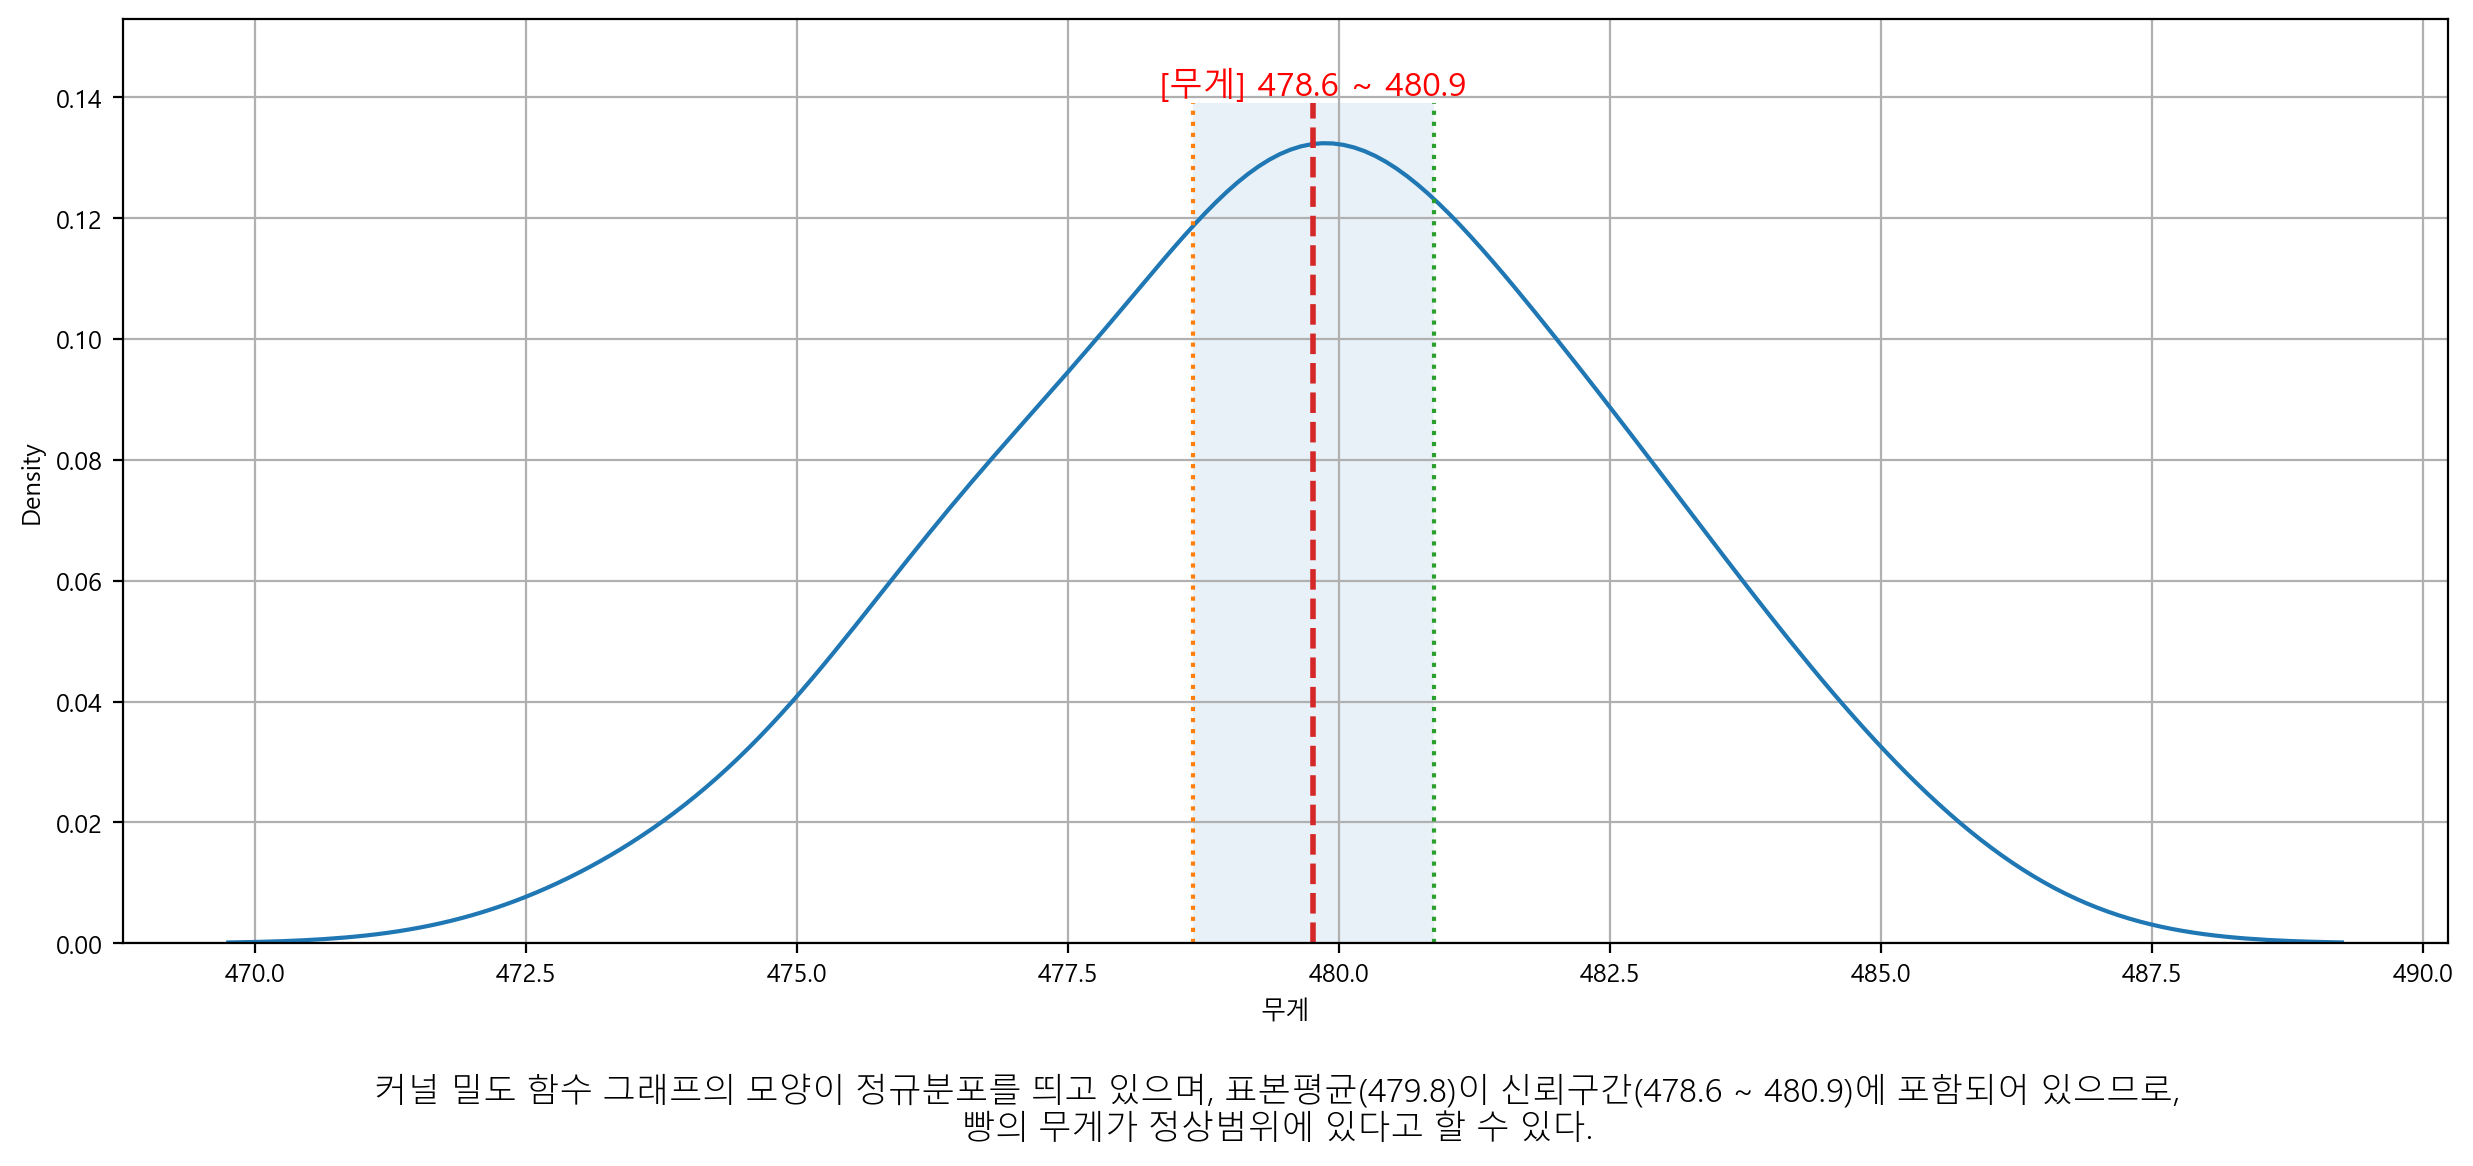

In [7]:
plt.figure()

data = origin['무게']                           # 데이터만 추출
max = data.max()                                # 최대값
clevel = 0.95                                   # 신뢰수준
dof = len(data) - 1                             # 자유도
sample_mean = data.mean()                       # 표본평균
sample_std = data.std(ddof=1)                   # 표본표준편차
sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

# 신뢰구간
cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

sb.kdeplot(data=data)

xmin, xmax, ymin, ymax = plt.axis()

# 신뢰구간 그리기
plt.plot([cmin, cmin], [ymin, ymax], linestyle=':')
plt.plot([cmax, cmax], [ymin, ymax], linestyle=':')
plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

# 평균 그리기
plt.plot([sample_mean, sample_mean], [ymin, ymax], linestyle='--', linewidth=2)

plt.text(x=(cmax-cmin)/2+cmin,
         y=ymax,
         s="[%s] %0.1f ~ %0.1f" % (data.name, cmin, cmax),
         horizontalalignment="center",
         verticalalignment="bottom",
         fontdict={"size": 12, "color": "red"})

plt.ylim(ymin, ymax*1.1)

txt = """커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 표본평균({:.1f})이 신뢰구간({:.1f} ~ {:.1f})에 포함되어 있으므로,
빵의 무게가 정상범위에 있다고 할 수 있다.""".format(sample_mean, cmin, cmax)

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.grid()
plt.show()
plt.close()

In [9]:
s, p = normaltest(origin['무게'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p >= 0.05)

'statistic: 0.083, p-value: 0.959, 정규성 충족 여부: True'

In [13]:
s, p = ttest_1samp(origin['무게'], 500)
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p < 0.05 else "귀무")

'statistic: -37.524, p-value: 0.000, 대립가설 채택'

## 문제 2

어떤 화학약품의 제조에 상표가 다른 두 종류의 원료가 사용되고 있다.

각 원료에서 주성분 A의 함량은 다음과 같다. 단, 함량은 정규분포를 따른다고 가정한다.

이 두 원료의 주성분 A의 함량이 다른지를 분석하라.

<table>
    <tr>
        <th>상표1</th>
        <td>80.4</td>
        <td>78.2</td>
        <td>80.1</td>
        <td>77.1</td>
        <td>79.6</td>
        <td>80.4</td>
        <td>81.6</td>
        <td>79.9</td>
        <td>84.4</td>
        <td>80.9</td>
        <td>83.1</td>
    </tr>
    <tr>
        <th>상표2</th>
        <td>80.1</td>
        <td>81.2</td>
        <td>79.5</td>
        <td>78</td>
        <td>76.1</td>
        <td>77</td>
        <td>80.1</td>
        <td>79.9</td>
        <td>78.8</td>
        <td>80.8</td>
        <td>79.3</td>
    </tr>
</table>

> https://data.hossam.kr/mldata/material.xlsx


In [14]:
origin = read_excel("https://data.hossam.kr/mldata/material.xlsx")
origin

,상표1,상표2
0,80.4,80.1
1,78.2,81.2
2,80.1,79.5
3,77.1,78.0
4,79.6,76.1
5,80.4,77.0
6,81.6,80.1
7,79.9,79.9
8,84.4,78.8
9,80.9,80.8


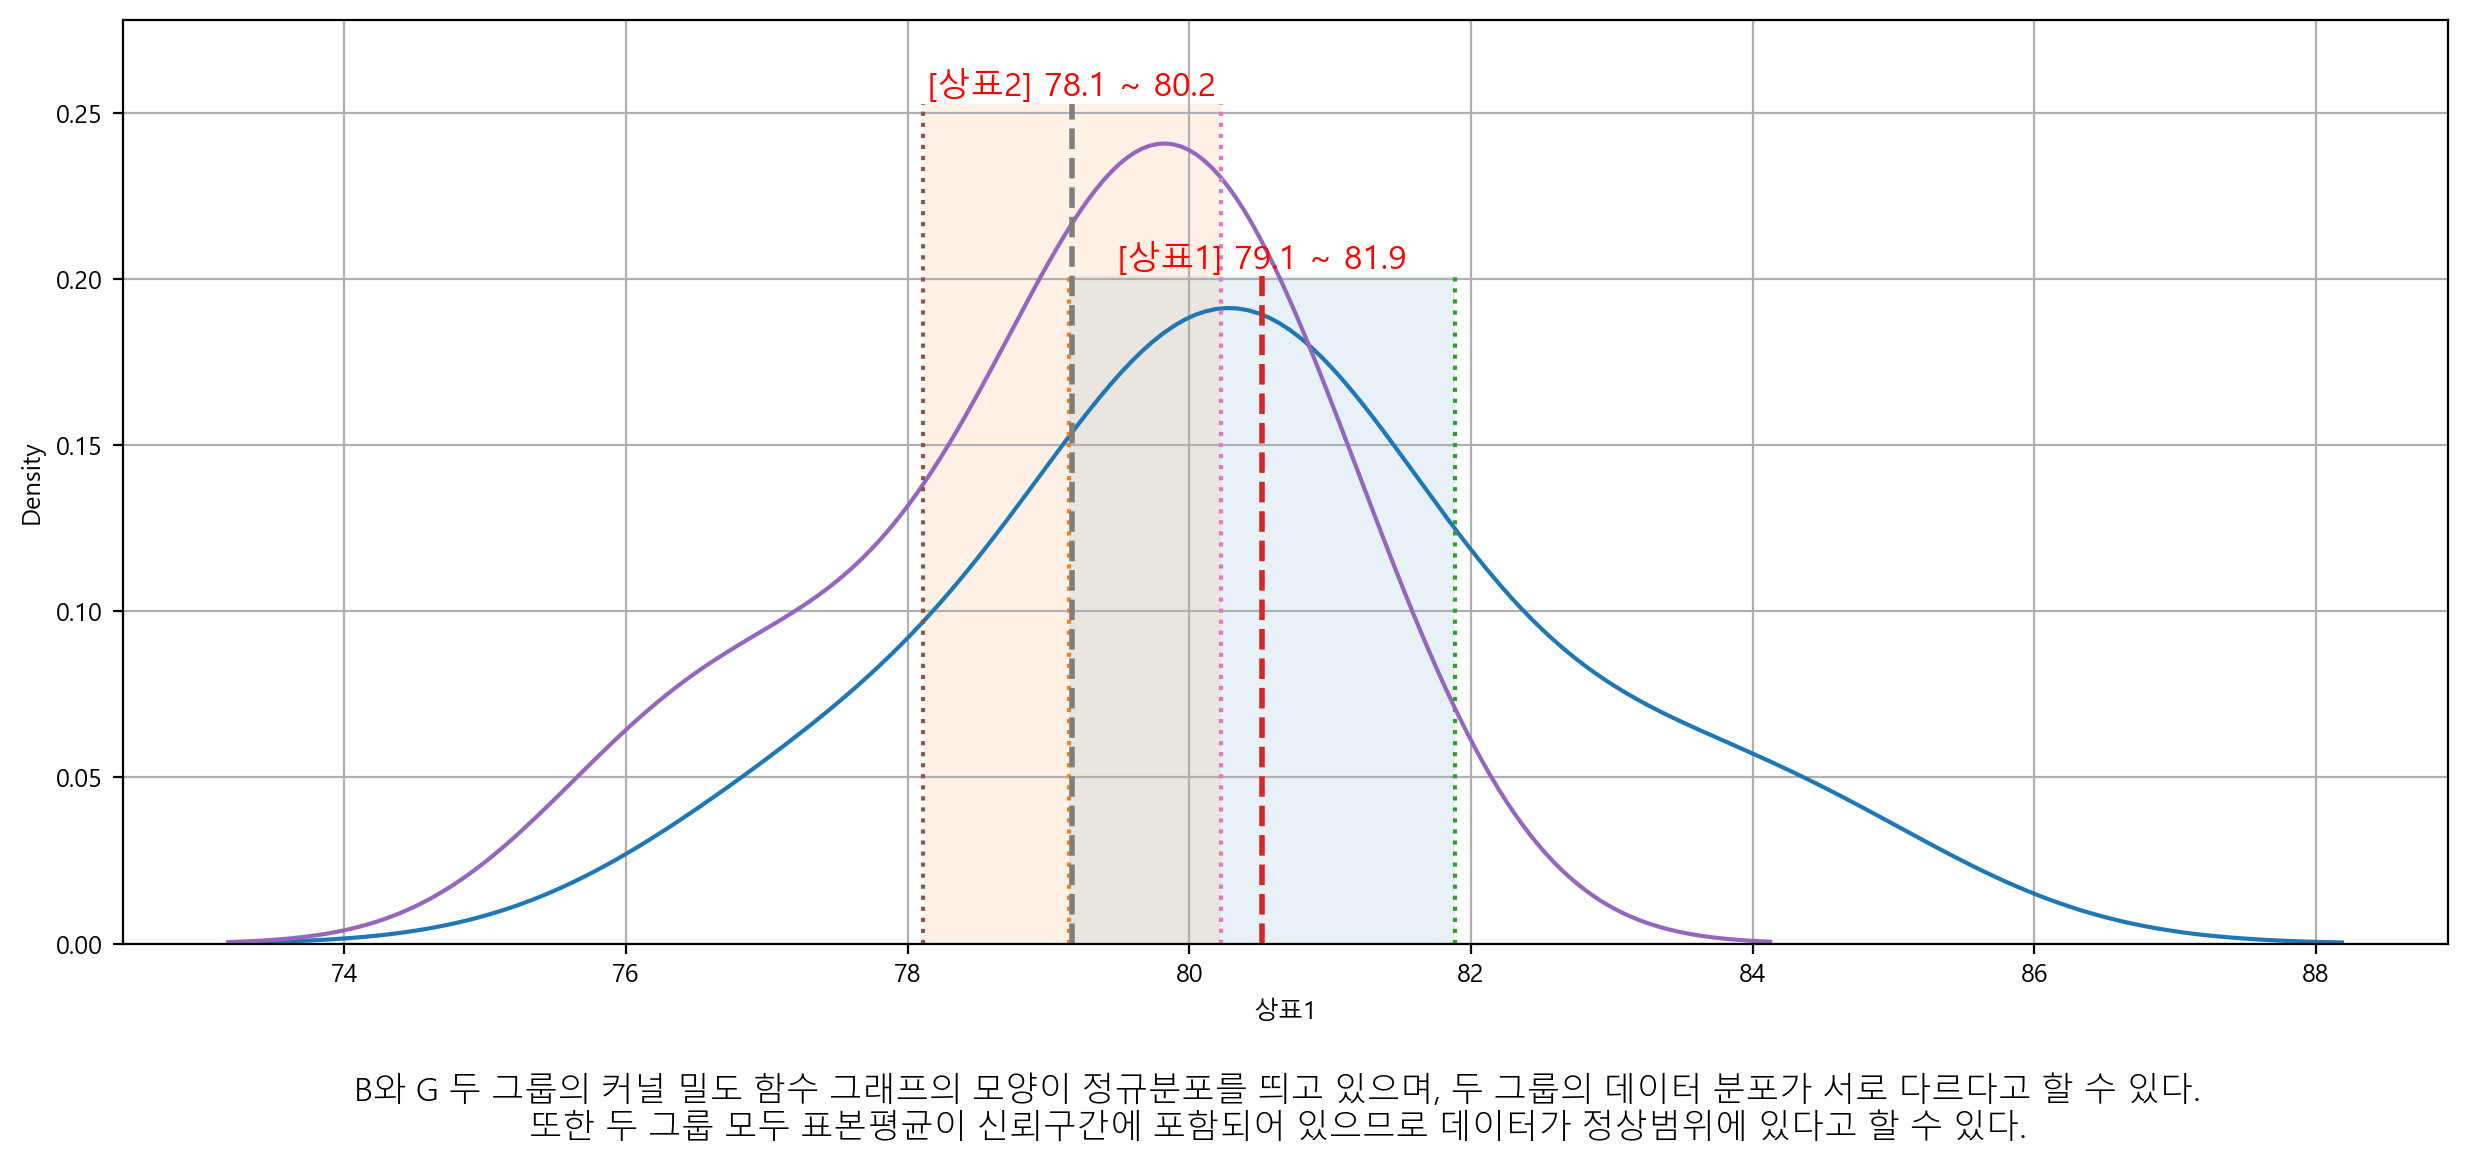

In [15]:
plt.figure()

for c in origin.columns:
    #print(c)
    
    data = origin[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [ymin, ymax], linestyle=':')
    plt.plot([cmax, cmax], [ymin, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

plt.ylim(0, ymax*1.1)

txt = """상표1와 상표2 두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.grid()
plt.show()
plt.close()

In [16]:
for c in origin.columns:
    s, p = normaltest(origin[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))

[상표1] statistic: 0.638, p-value: 0.727, 정규성 충족 여부: True
[상표2] statistic: 1.560, p-value: 0.458, 정규성 충족 여부: True


In [64]:
from scipy.stats import t, normaltest, bartlett, levene, ttest_ind
from statannotations.Annotator import Annotator

In [19]:
normal_dist = True      # 정규성 만족 여부
data = origin.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)
    
print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Bartlett 검정: statistic: 0.626, p-value: 0.429, 등분산성 충족 여부: True


In [20]:
s, p = ttest_ind(origin['상표1'], origin['상표2'])
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 1.744, p-value: 0.096, 귀무가설 채택'

> `p-value`가 0.05보다 크므로($p < 0.05$) 상표1을 사용한 그룹과 상표2를 사용한 그룹간 평균 성분함량에는 차이가 없다.

## 문제 3

특정 피임약이 사용자의 혈압을 저하시키는지 조사하고자 한다.

이를 위해 부인 15명을 대상으로 평상시 혈압을 측정한 뒤, 이들에게 이 피임약을 일정 기간 복용하게 한 후 이들의 혈압을 다시 측정한 결과를 기록했다.

얻어진 데이터는 다음과 같다. 피임약 복용이 혈압에 영향을 주는지 분석하라.

<table>
    <tr>
        <th>복용전</th>
        <td>70</td>
        <td>80</td>
        <td>72</td>
        <td>76</td>
        <td>76</td>
        <td>76</td>
        <td>72</td>
        <td>78</td>
        <td>82</td>
        <td>64</td>
        <td>74</td>
        <td>92</td>
        <td>74</td>
        <td>68</td>
        <td>84</td>
    </tr>
    <tr>
        <th>복용후</th>
        <td>68</td>
        <td>72</td>
        <td>62</td>
        <td>70</td>
        <td>58</td>
        <td>66</td>
        <td>68</td>
        <td>52</td>
        <td>64</td>
        <td>72</td>
        <td>74</td>
        <td>60</td>
        <td>74</td>
        <td>72</td>
        <td>74</td>
    </tr>
</table>

> https://data.hossam.kr/mldata/blood_pressure.xlsx

In [21]:
origin = read_excel("https://data.hossam.kr/mldata/blood_pressure.xlsx")
origin

,복용전,복용후
0,70,68
1,80,72
2,72,62
3,76,70
4,76,58
5,76,66
6,72,68
7,78,52
8,82,64
9,64,72


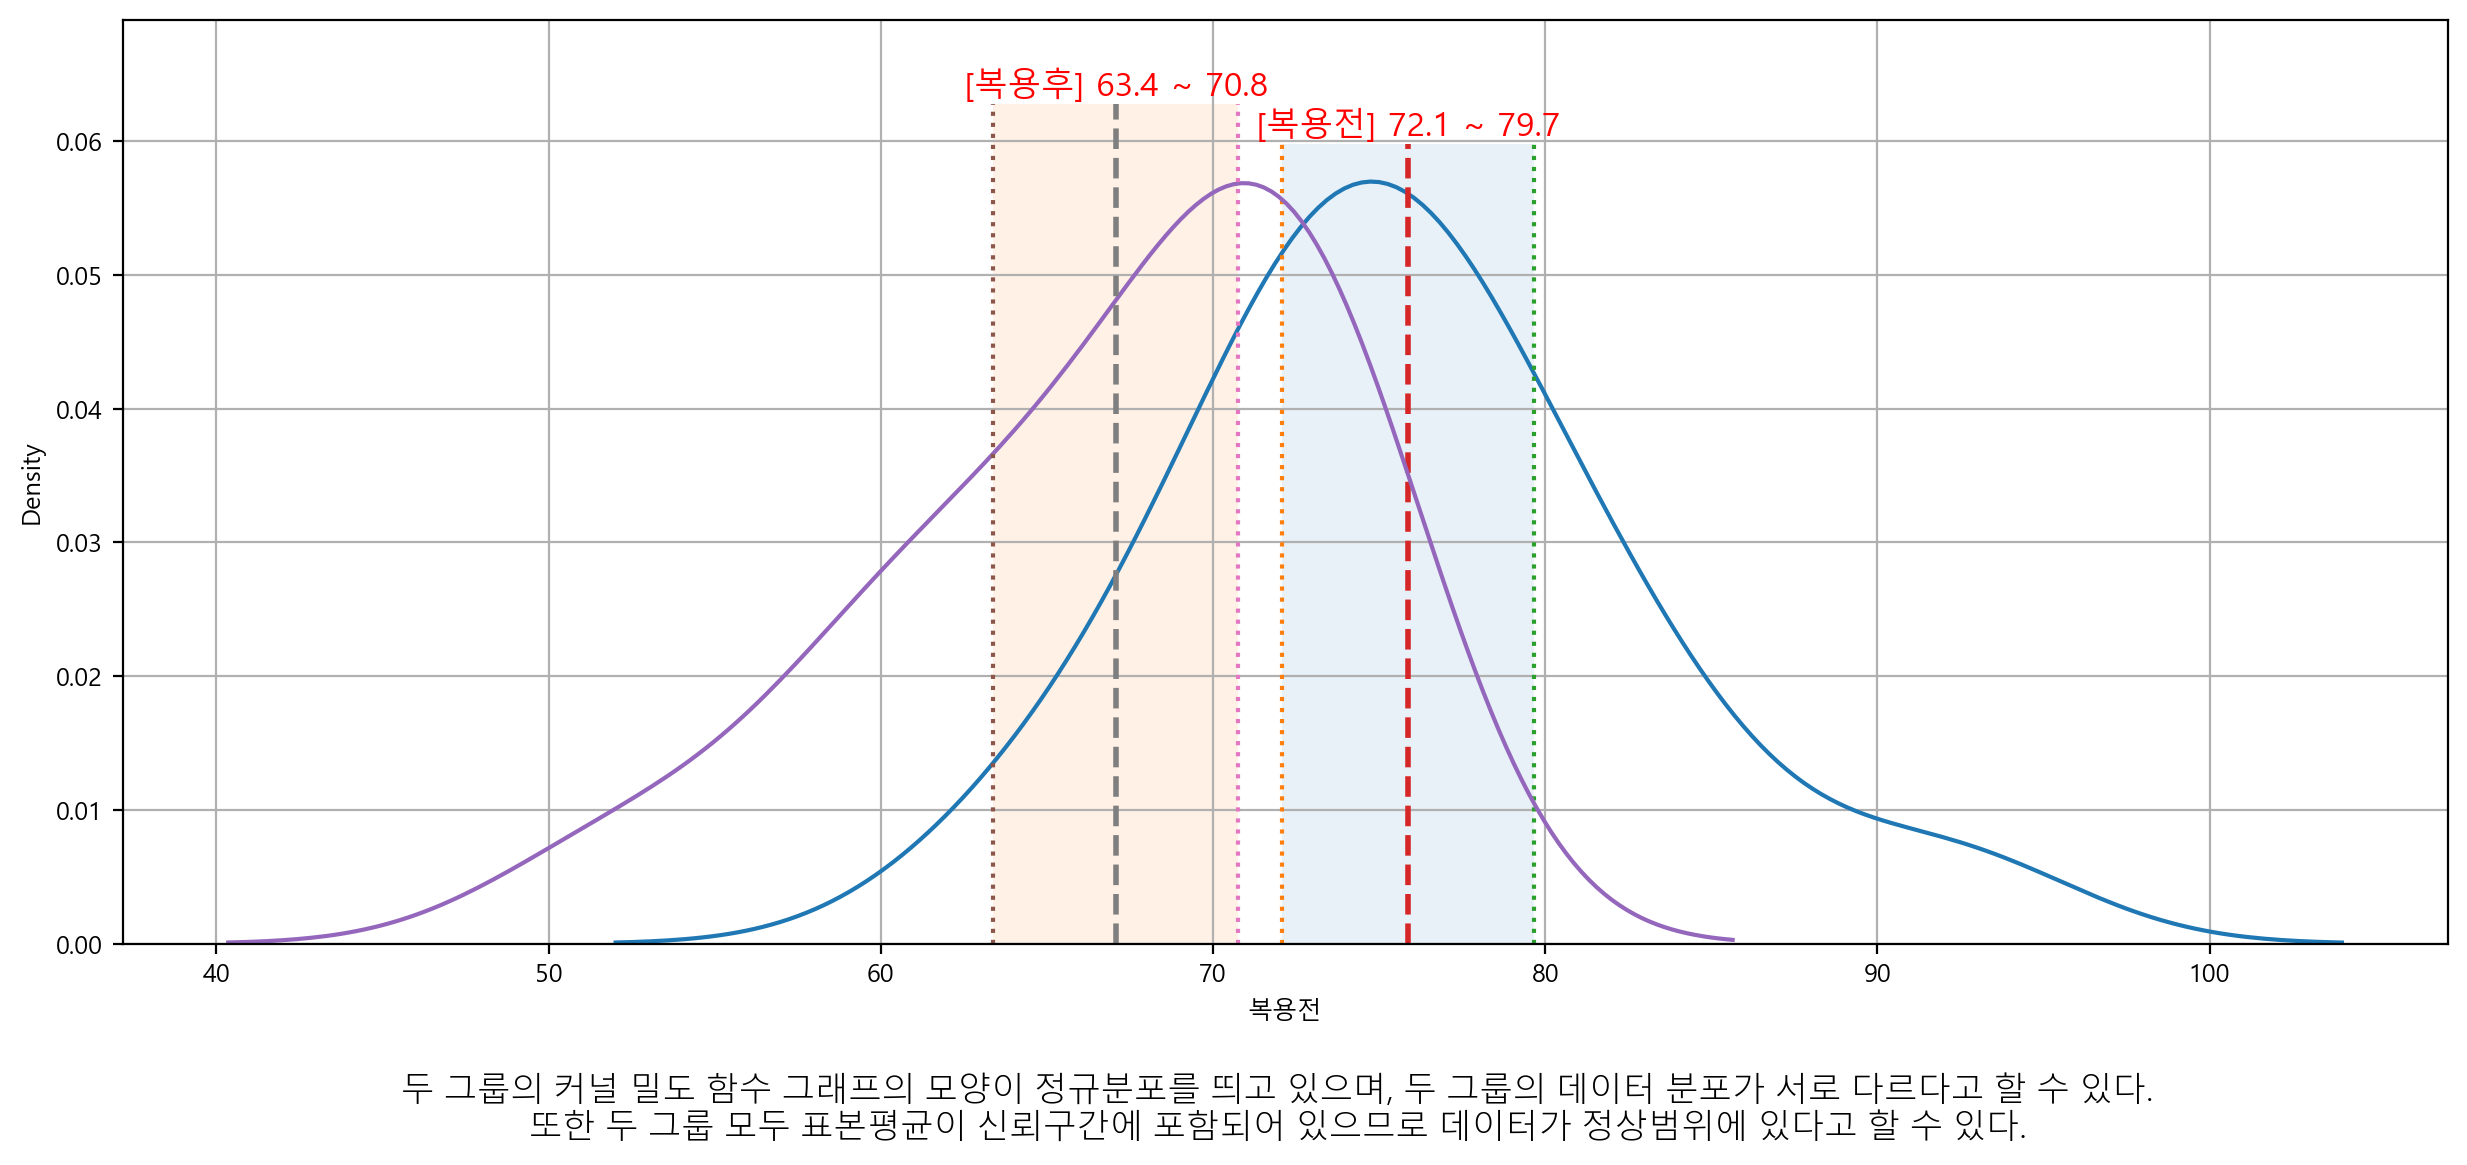

In [22]:
plt.figure()

for c in origin.columns:
    #print(c)
    
    data = origin[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [ymin, ymax], linestyle=':')
    plt.plot([cmax, cmax], [ymin, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

plt.ylim(ymin, ymax*1.1)

txt = """두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.grid()
plt.show()
plt.close()

In [24]:
for c in origin.columns:
    s, p = normaltest(origin[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))

[복용전] statistic: 2.591, p-value: 0.274, 정규성 충족 여부: True
[복용후] statistic: 2.656, p-value: 0.265, 정규성 충족 여부: True


In [26]:
from scipy.stats import t, normaltest, bartlett, levene, ttest_rel, mannwhitneyu

In [25]:
normal_dist = True      # 정규성 만족 여부
data = origin.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)
    
print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Bartlett 검정: statistic: 0.011, p-value: 0.916, 등분산성 충족 여부: True


In [28]:
s, p = ttest_rel(origin['복용전'], origin['복용후'], alternative='greater')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 3.105, p-value: 0.004, 대립가설 채택'

## 문제 4

고등학교 육상선수에게 체중감량을 시키면 달리기에 어떤 변화가 일어나는지 조사하기 위하여, 어떤 고등학교 육상선수 10명에게 감량훈련(2~4kg 정도)을 시킨 후 100m 달리기를 실시하여 다음의 데이터를 얻었다.

감량 전과 후에 달리기 속도에 차이가 있는지 분석하라

<table>
    <tr>
        <th>감량전</th>
        <td>14.5</td>
        <td>13.4</td>
        <td>13</td>
        <td>14.5</td>
        <td>13.3</td>
        <td>14.2</td>
        <td>13.6</td>
        <td>13.9</td>
        <td>13.2</td>
        <td>13</td>
    </tr>
    <tr>
        <th>감량후</th>
        <td>14.3</td>
        <td>13.4</td>
        <td>13.1</td>
        <td>13.9</td>
        <td>13.1</td>
        <td>13.9</td>
        <td>13.6</td>
        <td>14</td>
        <td>12.8</td>
        <td>12.8</td>
    </tr>
</table>

> https://data.hossam.kr/mldata/runner_diet.xlsx

In [31]:
origin = read_excel("https://data.hossam.kr/mldata/runner_diet.xlsx")
origin

,감량전,감량후
0,14.5,14.3
1,13.4,13.4
2,13.0,13.1
3,14.5,13.9
4,13.3,13.1
5,14.2,13.9
6,13.6,13.6
7,13.9,14.0
8,13.2,12.8
9,13.0,12.8


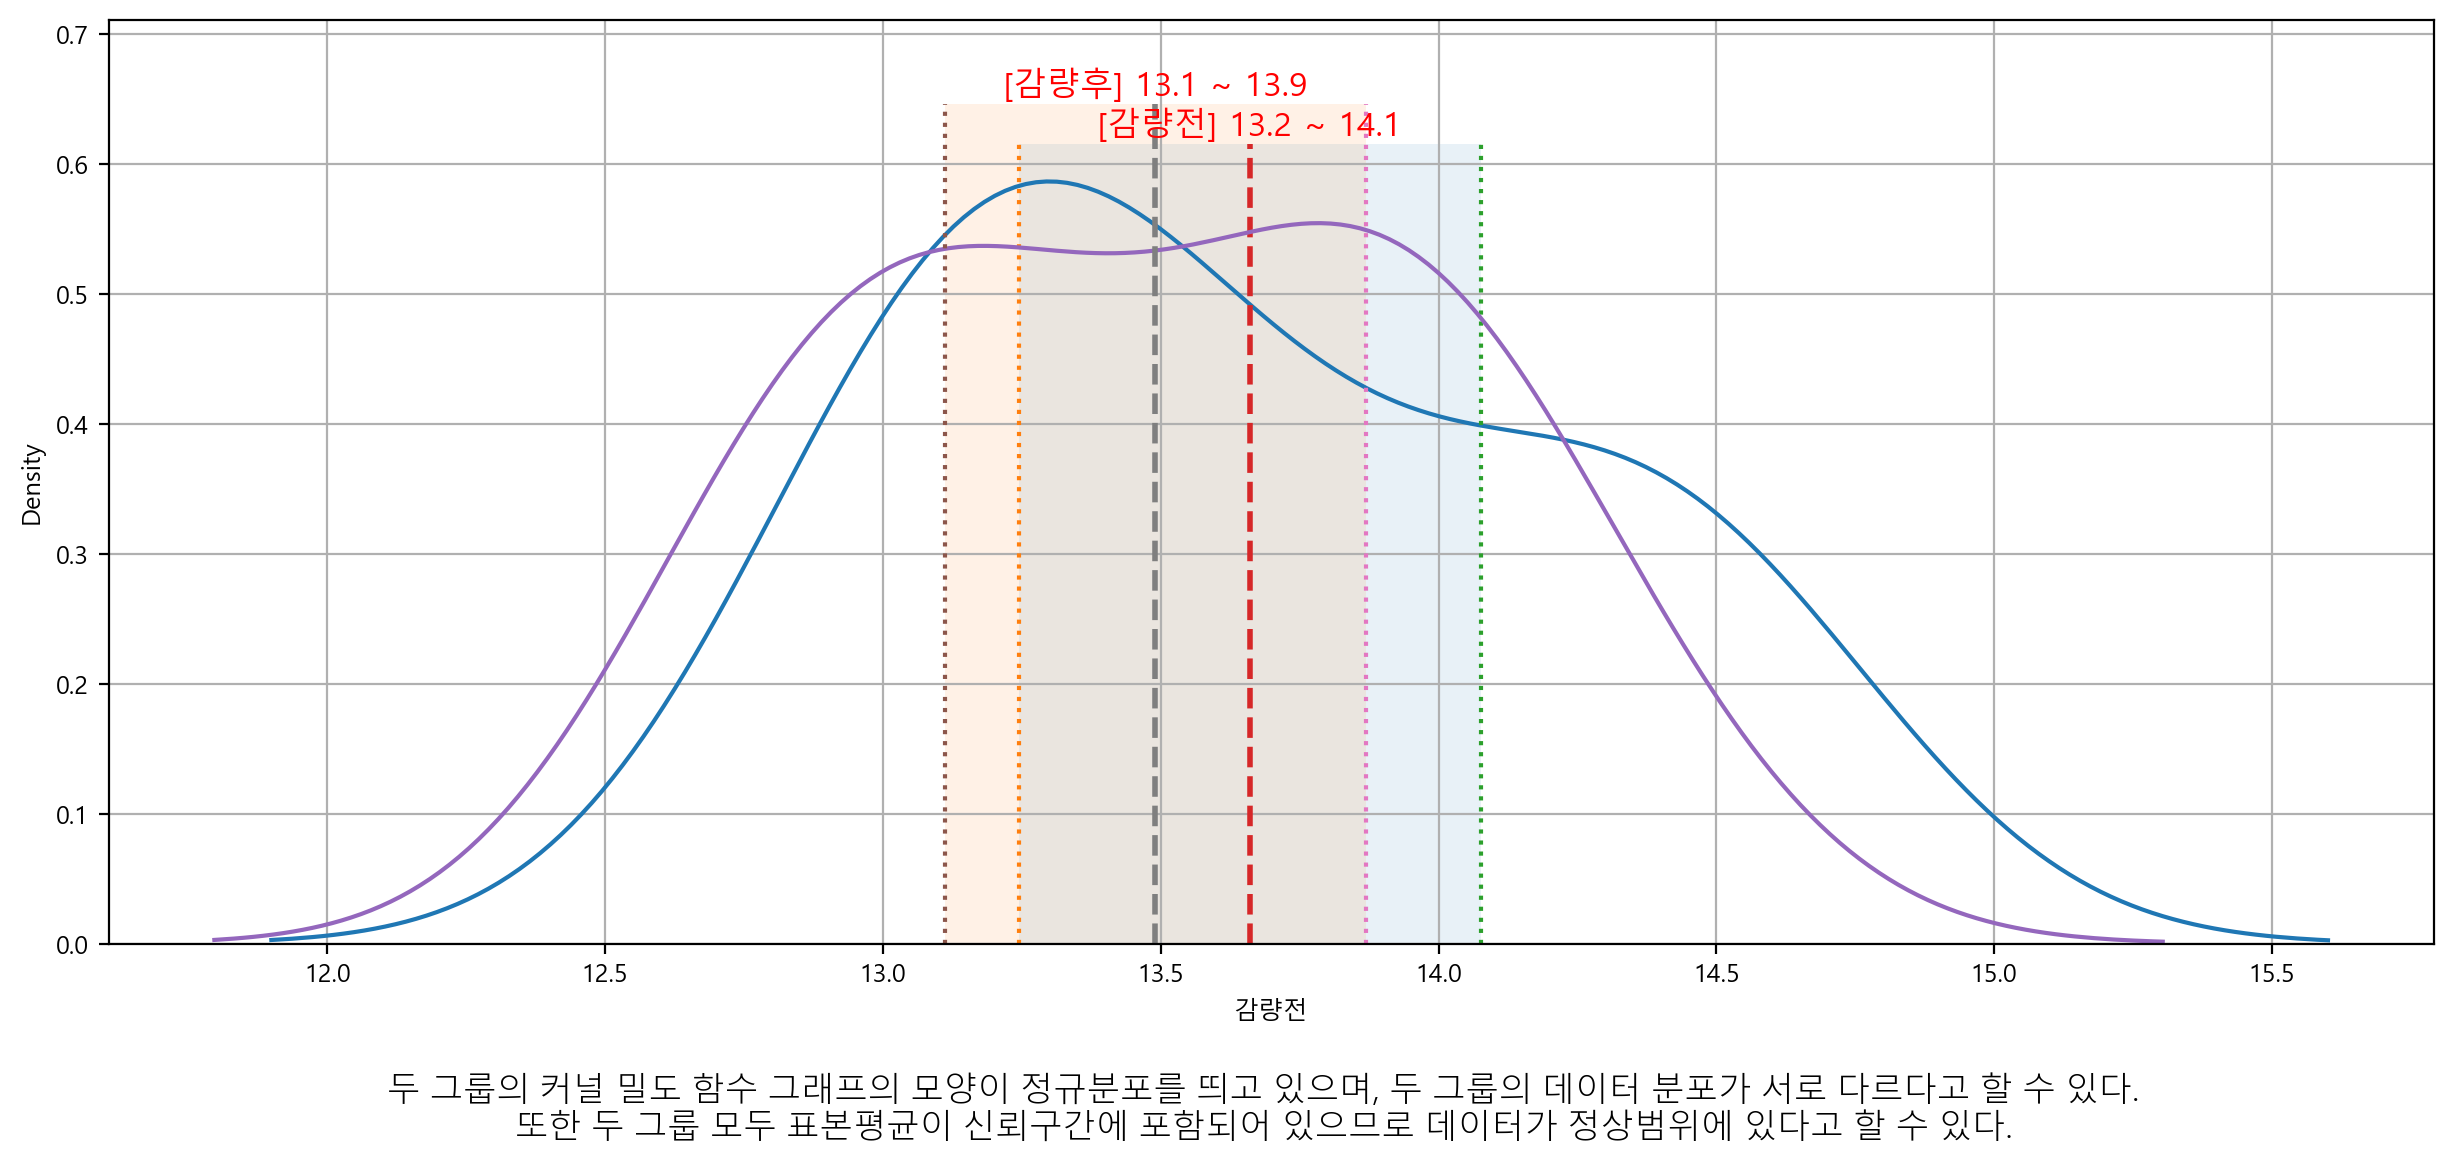

In [32]:
plt.figure()

for c in origin.columns:
    #print(c)
    
    data = origin[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [ymin, ymax], linestyle=':')
    plt.plot([cmax, cmax], [ymin, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

plt.ylim(ymin, ymax*1.1)

txt = """두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.grid()
plt.show()
plt.close()

In [33]:
for c in origin.columns:
    s, p = normaltest(origin[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))

[감량전] statistic: 2.063, p-value: 0.356, 정규성 충족 여부: True
[감량후] statistic: 1.647, p-value: 0.439, 정규성 충족 여부: True


In [34]:
normal_dist = True      # 정규성 만족 여부
data = origin.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)
    
print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Bartlett 검정: statistic: 0.073, p-value: 0.787, 등분산성 충족 여부: True


In [40]:
s, p = ttest_rel(origin['감량전'], origin['감량후'], alternative='two-sided')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 2.375, p-value: 0.042, 대립가설 채택'

> 차이값에 대한 t 통계량의 값이 `2.375`이고 이에 대응되는 유의확률이 `0.042`이므로 ($p < 0.05$)` 귀무가설을 기각하고 대립가설을 채택한다.
>
> 즉, 체중감량은 달리기 선수의 퍼포먼스에 영향을 미친다.

## 문제 5

고등학교 레슬링 선수에게 체중감량을 시키면 체력에 어떤 변화가 일어나는지 조사하기 위하여, 어느 고등학교의 레슬링 선수 12명을 표본추출하여 감량시킨 후 다음의 체력 데이터를 얻었다.

감량 전과 감량 후 간에 차이가 있는가의 대응비교를 악력, 윗몸일으키기, 턱걸이, 100m 달리기에 대하여 실시하고 분석하라.

| 이름  | 감량전 악력 | 감량후 악력 | 감량전 윗몸일으키기 | 감량후 윗몸일으키기 | 감량전 턱걸이 | 감량후 턱걸이 |
|-----|--------|--------|------------|------------|---------|---------|
| B.S | 43     | 41     | 35         | 41         | 25      | 29      |
| P.J | 42     | 41     | 40         | 44         | 25      | 29      |
| G.G | 52     | 50     | 36         | 41         | 22      | 23      |
| A.L | 53     | 52     | 38         | 42         | 10      | 15      |
| I.H | 44     | 40     | 36         | 42         | 15      | 19      |
| B.Y | 46     | 47     | 39         | 44         | 17      | 19      |
| I.K | 48     | 47     | 35         | 42         | 24      | 26      |
| K.B | 58     | 55     | 34         | 36         | 17      | 18      |
| K.J | 50     | 50     | 33         | 35         | 17      | 20      |
| S.S | 48     | 50     | 39         | 45         | 21      | 25      |
| S.P | 56     | 48     | 37         | 37         | 31      | 35      |
| S.J | 43     | 41     | 33         | 37         | 15      | 22      |

> https://data.hossam.kr/mldata/wrestler_diet.xlsx

In [67]:
origin = read_excel("https://data.hossam.kr/mldata/wrestler_diet.xlsx", index_col="이름")
origin

,감량전 악력,감량후 악력,감량전 윗몸일으키기,감량후 윗몸일으키기,감량전 턱걸이,감량후 턱걸이
이름,,,,,,
B.S,43,41,35,41,25,29
P.J,42,41,40,44,25,29
G.G,52,50,36,41,22,23
A.L,53,52,38,42,10,15
I.H,44,40,36,42,15,19
B.Y,46,47,39,44,17,19
I.K,48,47,35,42,24,26
K.B,58,55,34,36,17,18
K.J,50,50,33,35,17,20


In [76]:
df = origin.reset_index
df

<bound method DataFrame.reset_index of      감량전 악력  감량후 악력  감량전 윗몸일으키기  감량후 윗몸일으키기  감량전 턱걸이  감량후 턱걸이
이름                                                           
B.S      43      41          35          41       25       29
P.J      42      41          40          44       25       29
G.G      52      50          36          41       22       23
A.L      53      52          38          42       10       15
I.H      44      40          36          42       15       19
B.Y      46      47          39          44       17       19
I.K      48      47          35          42       24       26
K.B      58      55          34          36       17       18
K.J      50      50          33          35       17       20
S.S      48      50          39          45       21       25
S.P      56      48          37          37       31       35
S.J      43      41          33          37       15       22>

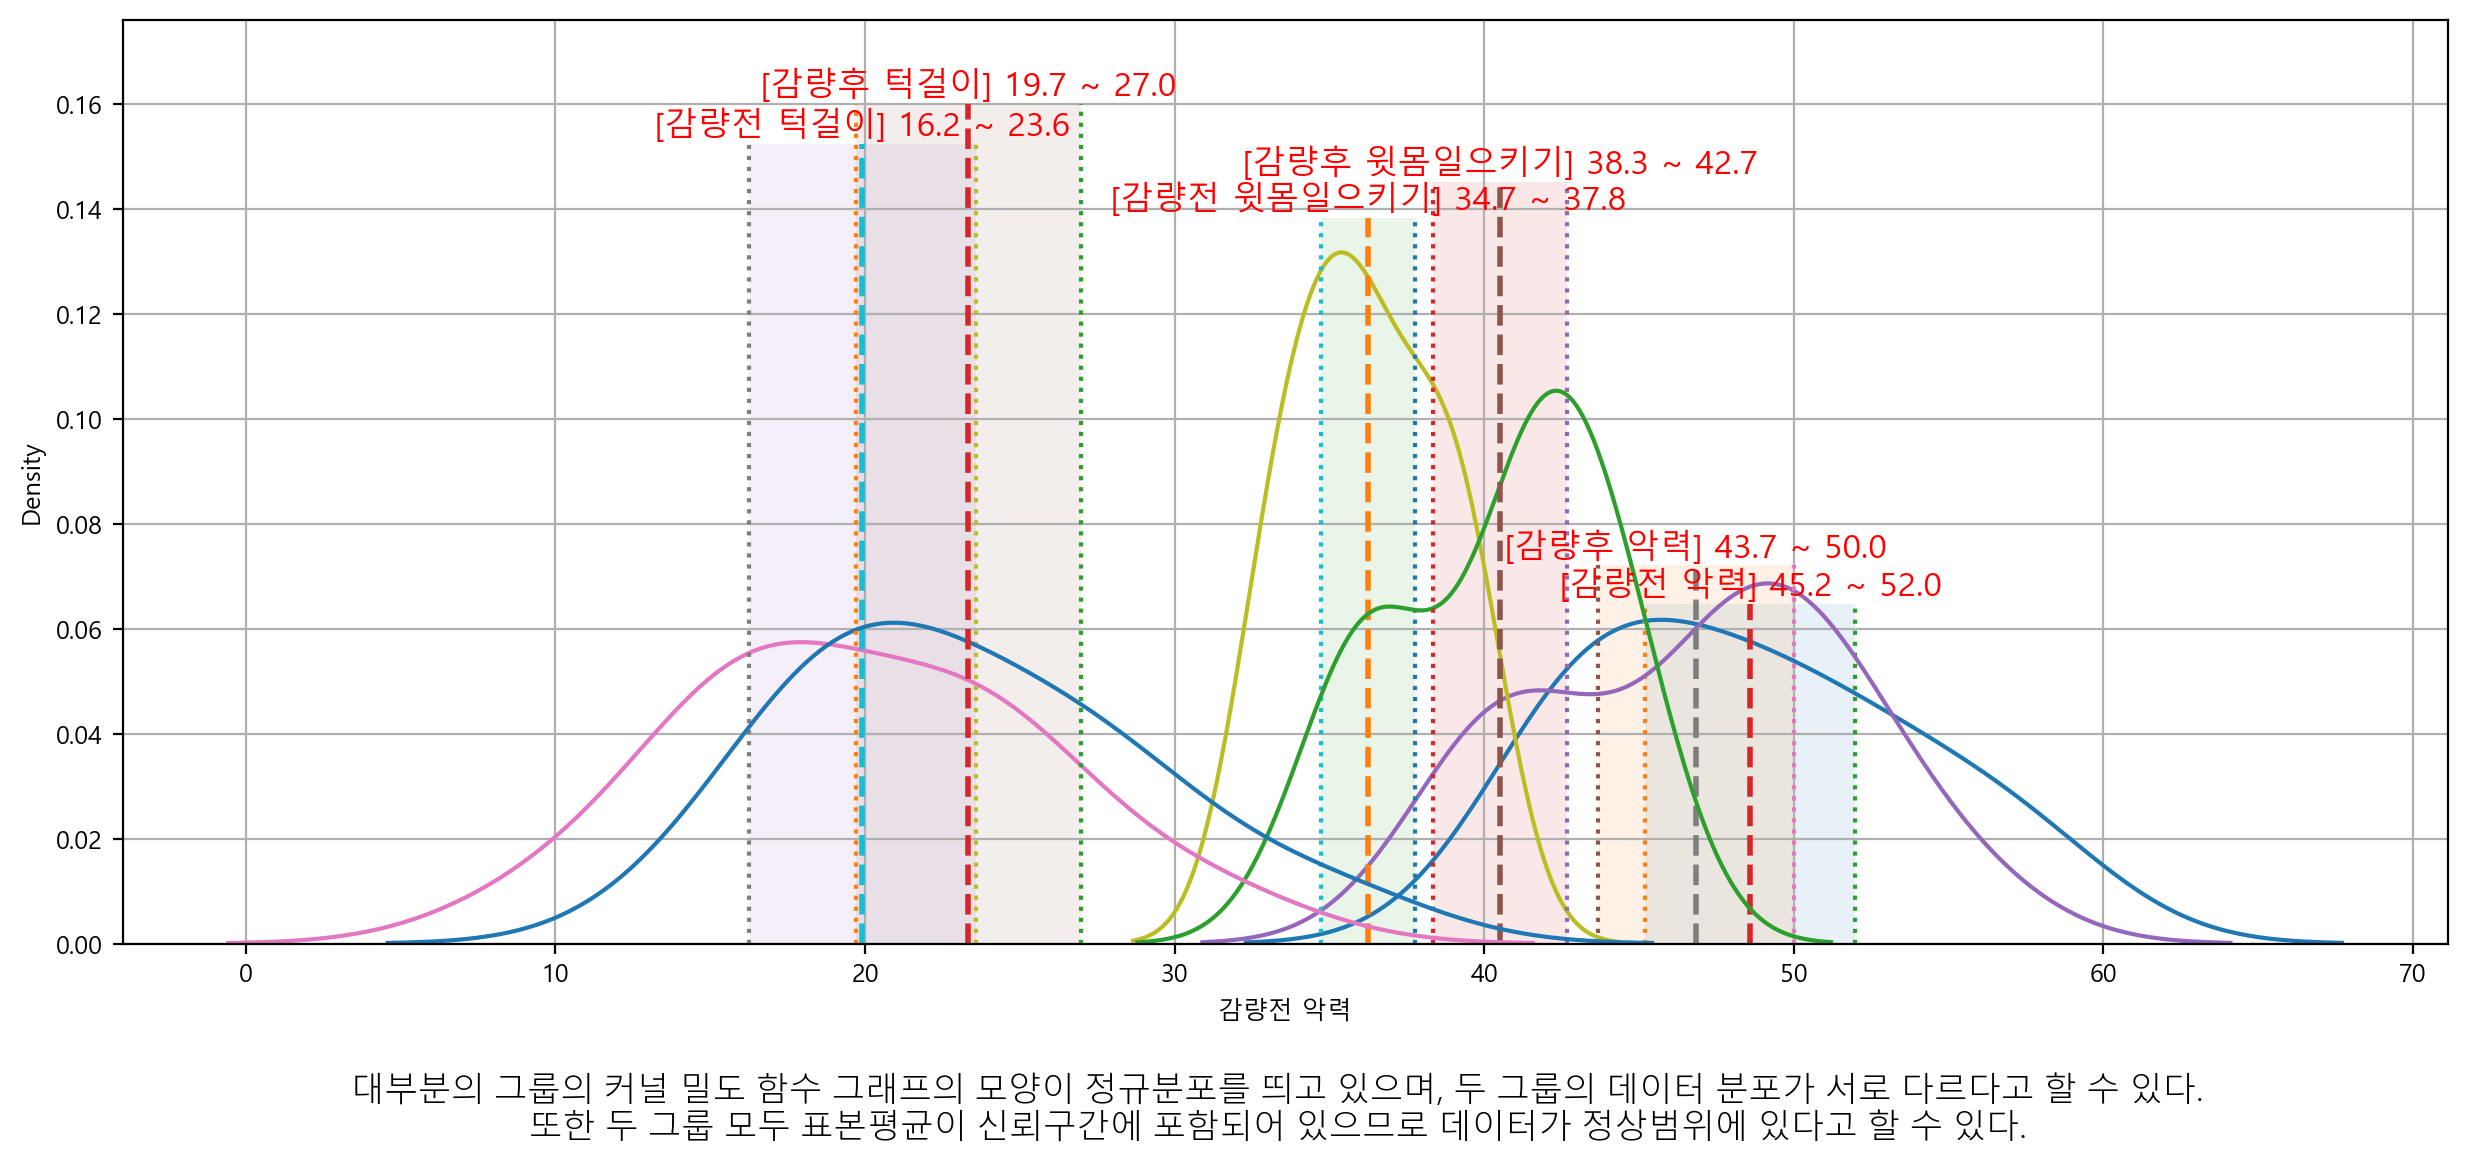

In [68]:
plt.figure()

for c in origin.columns:
    #print(c)
    
    data = origin[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [ymin, ymax], linestyle=':')
    plt.plot([cmax, cmax], [ymin, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})
    
txt = """대부분의 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.ylim(0, ymax*1.1)
plt.grid()
plt.show()
plt.close()

In [69]:
for c in origin.columns:
    s, p = normaltest(origin[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))

[감량전 악력] statistic: 1.146, p-value: 0.564, 정규성 충족 여부: True
[감량후 악력] statistic: 1.358, p-value: 0.507, 정규성 충족 여부: True
[감량전 윗몸일으키기] statistic: 1.363, p-value: 0.506, 정규성 충족 여부: True
[감량후 윗몸일으키기] statistic: 2.008, p-value: 0.366, 정규성 충족 여부: True
[감량전 턱걸이] statistic: 0.154, p-value: 0.926, 정규성 충족 여부: True
[감량후 턱걸이] statistic: 1.021, p-value: 0.600, 정규성 충족 여부: True


In [70]:
normal_dist = True      # 정규성 만족 여부
data = origin.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)
    
print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Bartlett 검정: statistic: 10.780, p-value: 0.056, 등분산성 충족 여부: True


In [58]:
s, p = ttest_rel(origin['감량전 악력'], origin['감량후 악력'], alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 2.365, p-value: 0.981, 귀무가설 채택'

In [59]:
s, p = ttest_rel(origin['감량전 윗몸일으키기'], origin['감량후 윗몸일으키기'], alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -7.180, p-value: 0.000, 대립가설 채택'

In [60]:
s, p = ttest_rel(origin['감량전 턱걸이'], origin['감량후 턱걸이'], alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -6.842, p-value: 0.000, 대립가설 채택'

In [64]:
from pandas import melt

In [84]:
origin.reset_index(inplace= True)

In [109]:
mdf = melt(origin, id_vars = ['이름'], value_vars=['감량전 악력', '감량후 악력', '감량전 윗몸일으키기', '감량후 윗몸일으키기','감량전 턱걸이', '감량후 턱걸이'], var_name='group', value_name = 'value')
mdf

,이름,group,value
0,B.S,감량전 악력,43
1,P.J,감량전 악력,42
2,G.G,감량전 악력,52
3,A.L,감량전 악력,53
4,I.H,감량전 악력,44
...,...,...,...
67,K.B,감량후 턱걸이,18
68,K.J,감량후 턱걸이,20
69,S.S,감량후 턱걸이,25
70,S.P,감량후 턱걸이,35


In [2]:
import seaborn as sb
from statannotations.Annotator import Annotator
from matplotlib import pyplot as plt
from scipy.stats import t, normaltest, bartlett, levene, ttest_rel, mannwhitneyu
from statannotations.Annotator import Annotator

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

감량전 턱걸이 vs. 감량후 턱걸이: t-test paired samples, P_val:2.794e-05 t=-6.842e+00
감량전 악력 vs. 감량후 악력: t-test paired samples, P_val:3.745e-02 t=2.365e+00
감량전 윗몸일으키기 vs. 감량후 윗몸일으키기: t-test paired samples, P_val:1.798e-05 t=-7.180e+00


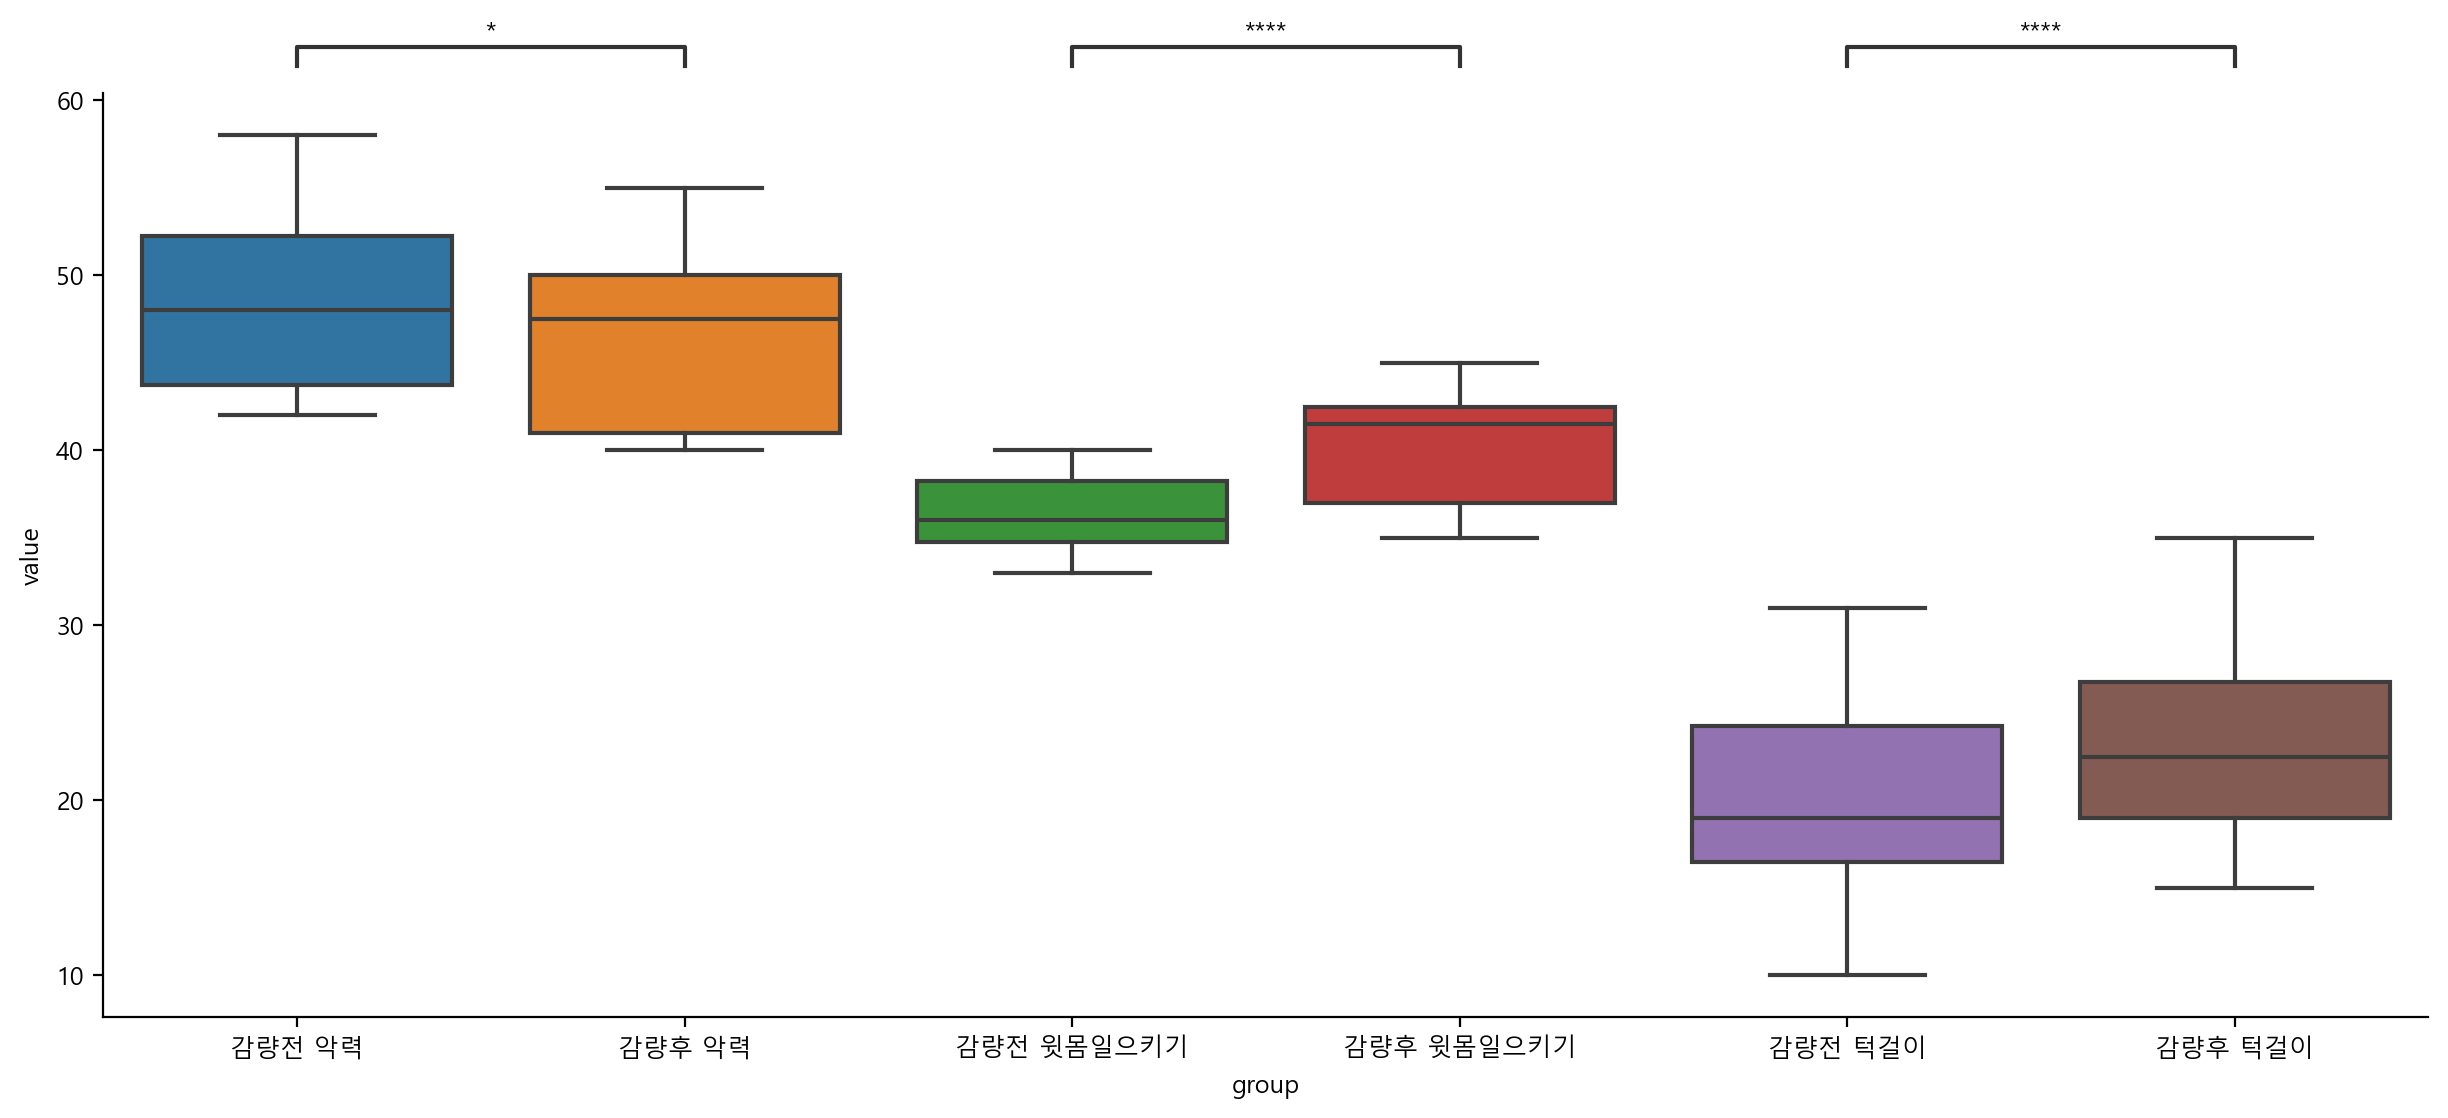

In [110]:
config = {
    "data": mdf,
    "x": 'group',
    "y": 'value',
    "pairs": [("감량전 턱걸이", "감량후 턱걸이"), ('감량전 악력', '감량후 악력'),('감량전 윗몸일으키기', '감량후 윗몸일으키기')],
    "test": "t-test_paired", # t-test_ind, t-test_paired, t-test_welch, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
    "text_format": "star", # full, simple, star
    "loc": "outside" # outside, inside
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])
ax.get_xaxis().axis_name

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()

## 문제 6

서울시에서 정의하는 상권의 종류는 발달상권, 골목상권, 관광특구, 전통시장이 있다.

주어진 데이터는 서울시의 2023년 상권에 따른 분기별 매출액과 매출건수에 대한 자료이다.

데이터를 상권별로 2023년 상반기(1,2분기)와 하반기(3,4분기)로 구분하여

하반기 매출이 상반기 매출액에 비해 어떻게 변화하였는지 확인하라.

| quarter | code    | type | name                   | sales_amount     | number_of_sales |
|---------|---------|------|------------------------|------------------|-----------------|
| 1       | 3001491 | 관광특구 | 이태원 관광특구               | 72,523,644,100   | 2,496,865       |
| 1       | 3001492 | 관광특구 | 명동 남대문 북창동 다동 무교동 관광특구 | 283,332,346,393  | 10,246,122      |
| 1       | 3001493 | 관광특구 | 동대문패션타운 관광특구           | 81,696,730,221   | 2,880,324       |
| 1       | 3001494 | 관광특구 | 종로·청계 관광특구             | 212,062,656,625  | 4,960,006       |
| 1       | 3001495 | 관광특구 | 잠실 관광특구                | 231,338,386,876  | 5,995,166       |
| 1       | 3001496 | 관광특구 | 강남 마이스 관광특구            | 214,898,892,413  | 4,862,653       |
| 1       | 3110001 | 골목상권 | 이북5도청사                 | 435,264,344      | 13,080          |
| 1       | 3110002 | 골목상권 | 독립문역 1번                | 4,062,721,649    | 339,647         |
| 1       | 3110003 | 골목상권 | 세검정초등학교                | 576,819,152      | 16,978          |
| 1       | 3110004 | 골목상권 | 대신고등학교                 | 312,840,339      | 7,706           |

> https://data.hossam.kr/mldata/commercial.xlsx


In [122]:
origin = read_excel("https://data.hossam.kr/mldata/commercial.xlsx")
origin

,quarter,code,type,name,sales_amount,number_of_sales
0,1,3001491,관광특구,이태원 관광특구,72523644100,2496865
1,1,3001492,관광특구,명동 남대문 북창동 다동 무교동 관광특구,283332346393,10246122
2,1,3001493,관광특구,동대문패션타운 관광특구,81696730221,2880324
3,1,3001494,관광특구,종로·청계 관광특구,212062656625,4960006
4,1,3001495,관광특구,잠실 관광특구,231338386876,5995166
...,...,...,...,...,...,...
6217,4,3130323,전통시장,둔촌역전통시장,13523478306,535132
6218,4,3130324,전통시장,길동복조리시장,6236556030,330148
6219,4,3130325,전통시장,명일전통시장,3973269286,186049
6220,4,3130326,전통시장,고덕 골목형상점가,15013907999,755565


In [3]:
from pandas import pivot_table
import numpy as np

In [123]:
df = origin.filter(['code','quarter','type','sales_amount'])
df

,code,quarter,type,sales_amount
0,3001491,1,관광특구,72523644100
1,3001492,1,관광특구,283332346393
2,3001493,1,관광특구,81696730221
3,3001494,1,관광특구,212062656625
4,3001495,1,관광특구,231338386876
...,...,...,...,...
6217,3130323,4,전통시장,13523478306
6218,3130324,4,전통시장,6236556030
6219,3130325,4,전통시장,3973269286
6220,3130326,4,전통시장,15013907999


### 반기별 컬럼 추가

> half[0] = 상반기
> half[1] = 하반기

In [124]:
df['half']=0
df

,code,quarter,type,sales_amount,half
0,3001491,1,관광특구,72523644100,0
1,3001492,1,관광특구,283332346393,0
2,3001493,1,관광특구,81696730221,0
3,3001494,1,관광특구,212062656625,0
4,3001495,1,관광특구,231338386876,0
...,...,...,...,...,...
6217,3130323,4,전통시장,13523478306,0
6218,3130324,4,전통시장,6236556030,0
6219,3130325,4,전통시장,3973269286,0
6220,3130326,4,전통시장,15013907999,0


In [125]:
df['half'].where((df['quarter']==1) | (df['quarter']==2) , 1, inplace=True)
df

,code,quarter,type,sales_amount,half
0,3001491,1,관광특구,72523644100,0
1,3001492,1,관광특구,283332346393,0
2,3001493,1,관광특구,81696730221,0
3,3001494,1,관광특구,212062656625,0
4,3001495,1,관광특구,231338386876,0
...,...,...,...,...,...
6217,3130323,4,전통시장,13523478306,1
6218,3130324,4,전통시장,6236556030,1
6219,3130325,4,전통시장,3973269286,1
6220,3130326,4,전통시장,15013907999,1


In [156]:
dff = df.groupby(['code', 'half', 'type'])['sales_amount'].sum()


> 시리즈 객체 DataFrame 으로 변환

In [157]:
df0 = DataFrame(dff)
df0.reset_index(inplace=True)

### sales_amount 자릿수 조정
> *1e-9

In [158]:
df0['sales_amount'] = df0['sales_amount']*1e-9
df0

,code,half,type,sales_amount
0,3001491,0,관광특구,184.380067
1,3001491,1,관광특구,199.007482
2,3001492,0,관광특구,656.491025
3,3001492,1,관광특구,830.115583
4,3001493,0,관광특구,186.778643
...,...,...,...,...
3114,3130325,1,전통시장,7.715055
3115,3130326,0,전통시장,24.620914
3116,3130326,1,전통시장,29.190329
3117,3130327,0,전통시장,26.038034


### 상권 분류
> df1 : 관광특구
> df2 : 전통시장
> df3 : 발달상권
> df4 : 전통시장

In [159]:
df0['type'].unique()

array(['관광특구', '골목상권', '발달상권', '전통시장'], dtype=object)

In [160]:
df1 = df0.loc[df0['type']=='관광특구']
df2 = df0.loc[df0['type']=='전통시장']
df3 = df0.loc[df0['type']=='발달상권']
df4 = df0.loc[df0['type']=='전통시장']
df1

,code,half,type,sales_amount
0,3001491,0,관광특구,184.380067
1,3001491,1,관광특구,199.007482
2,3001492,0,관광특구,656.491025
3,3001492,1,관광특구,830.115583
4,3001493,0,관광특구,186.778643
5,3001493,1,관광특구,233.183669
6,3001494,0,관광특구,476.687287
7,3001494,1,관광특구,558.193694
8,3001495,0,관광특구,501.873468
9,3001495,1,관광특구,772.869424


In [174]:
pivot_df1 = pivot_table(df1, 
                        index = ['code'],
                        columns = ['half'], 
                       values = 'sales_amount')
pivot_df2 = pivot_table(df2, 
                        index = ['code'],
                        columns = ['half'], 
                       values = 'sales_amount')
pivot_df3 = pivot_table(df3, 
                        index = ['code'],
                        columns = ['half'], 
                       values = 'sales_amount')
pivot_df4 = pivot_table(df4, 
                        index = ['code'],
                        columns = ['half'], 
                       values = 'sales_amount')


> 신뢰구간 그리기

TypeError: tuple indices must be integers or slices, not tuple

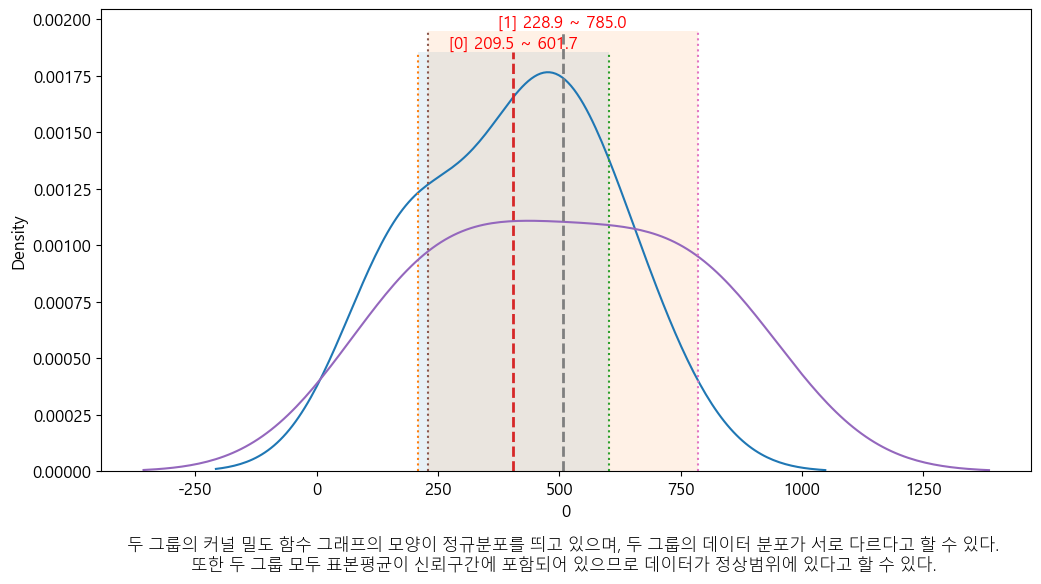

In [178]:
dfname = ['pivot_df1', 'pivot_df2', 'pivot_df3', 'pivot_df4']

for i in range(4):
    df = dfname[i]
    plt.figure()

    for c in df.columns:
        #print(c)
        
        data = pivot_df1[c]                                # 데이터만 추출
        max = data.max()                                # 최대값
        clevel = 0.95                                   # 신뢰수준
        dof = len(data) - 1                             # 자유도
        sample_mean = data.mean()                       # 표본평균
        sample_std = data.std(ddof=1)                   # 표본표준편차
        sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
        
        # 신뢰구간
        cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

        sb.kdeplot(data=data)

        xmin, xmax, ymin, ymax = plt.axis()

        # 신뢰구간 그리기
        plt.plot([cmin, cmin], [0, ymax], linestyle=':')
        plt.plot([cmax, cmax], [0, ymax], linestyle=':')
        plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

        # 평균 그리기
        plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

        plt.text(x=(cmax-cmin)/2+cmin,
                y=ymax,
                s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
                horizontalalignment="center",
                verticalalignment="bottom",
                fontdict={"size": 12, "color": "red"})
            
    txt = """두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
        또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

    plt.figtext(0.51, 0, txt, wrap=True,
                    verticalalignment="top", horizontalalignment="center",
                    fontdict={"size": 12, "weight": "light"})

    plt.ylim[0, ymax]
    plt.grid()
    plt.show()
    plt.close()

    for i, v in enumerate(dfname):
    #print(i)
    fields = columns[i*2:i*2+2]
    #print(fields)
    df = origin[fields]
    
    for c in df.columns:
        data = df[c]
        max = data.max()
        clevel = 0.95
        dof = len(data) - 1
        sample_mean = data.mean()
        sample_std = data.std(ddof=1)
        sample_std_error = sample_std / sqrt(len(data))
        
        # 신뢰구간
        cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)
    
        sb.kdeplot(data=data, ax=ax[i])
    
        xmin, xmax, ymin, ymax = ax[i].axis()
    
        # 신뢰구간 그리기
        ax[i].plot([cmin, cmin], [ymin, ymax], linestyle=':')
        ax[i].plot([cmax, cmax], [ymin, ymax], linestyle=':')
        ax[i].fill_between([cmin, cmax], y1=ymin, y2=ymax, alpha=0.1)
    
        # 평균 그리기
        ax[i].plot([sample_mean, sample_mean], [ymin, ymax], linestyle='--', linewidth=2)
    
        ax[i].text(x=(cmax-cmin)/2+cmin,
                y=ymax,
                s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
                horizontalalignment="center",
                verticalalignment="bottom",
                fontdict={"size": 12, "color": "red"})
    
        ax[i].set_ylim([ymin, ymax*1.1])
        ax[i].grid(True)

TypeError: 'tuple' object is not callable

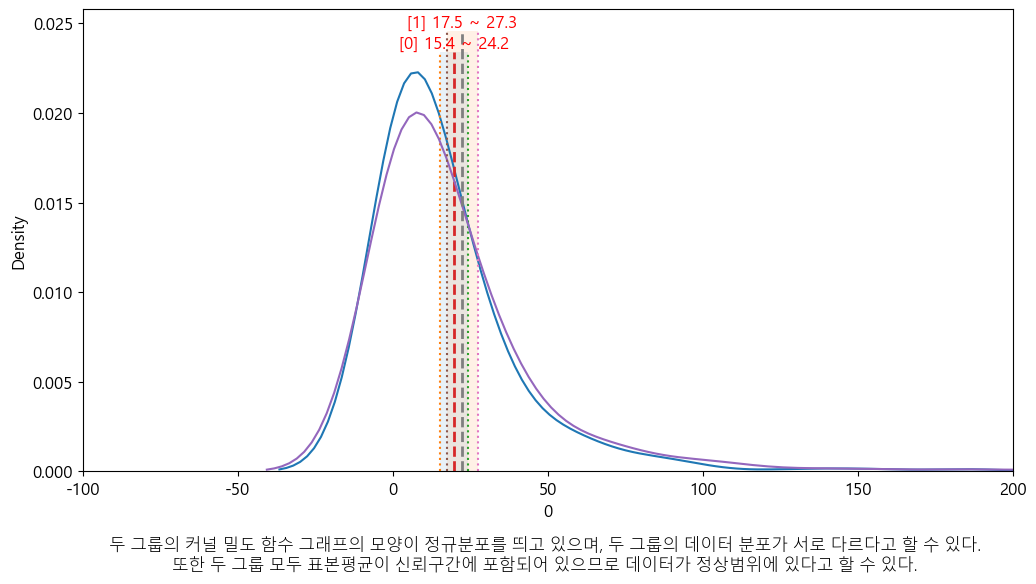

In [186]:
plt.figure()

for c in pivot_df2.columns:
    #print(c)
    
    data = pivot_df2[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [ymin, ymax], linestyle=':')
    plt.plot([cmax, cmax], [ymin, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})
    
txt = """두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.xlim(-100, 200)
plt.ylim(0, 0.023)
plt.grid()
plt.show()
plt.close()

TypeError: 'tuple' object is not callable

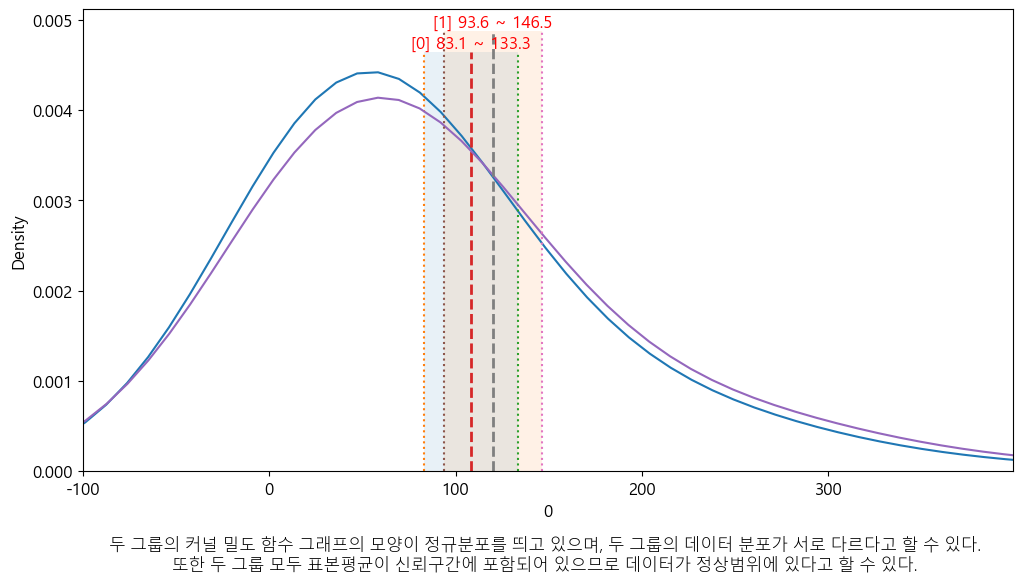

In [188]:
plt.figure()

for c in pivot_df3.columns:
    #print(c)
    
    data = pivot_df3[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [ymin, ymax], linestyle=':')
    plt.plot([cmax, cmax], [ymin, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})
    
txt = """두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})
plt.xlim(-100, 399)
plt.ylim(0, ymax*1.1)
plt.grid()
plt.show()
plt.close()

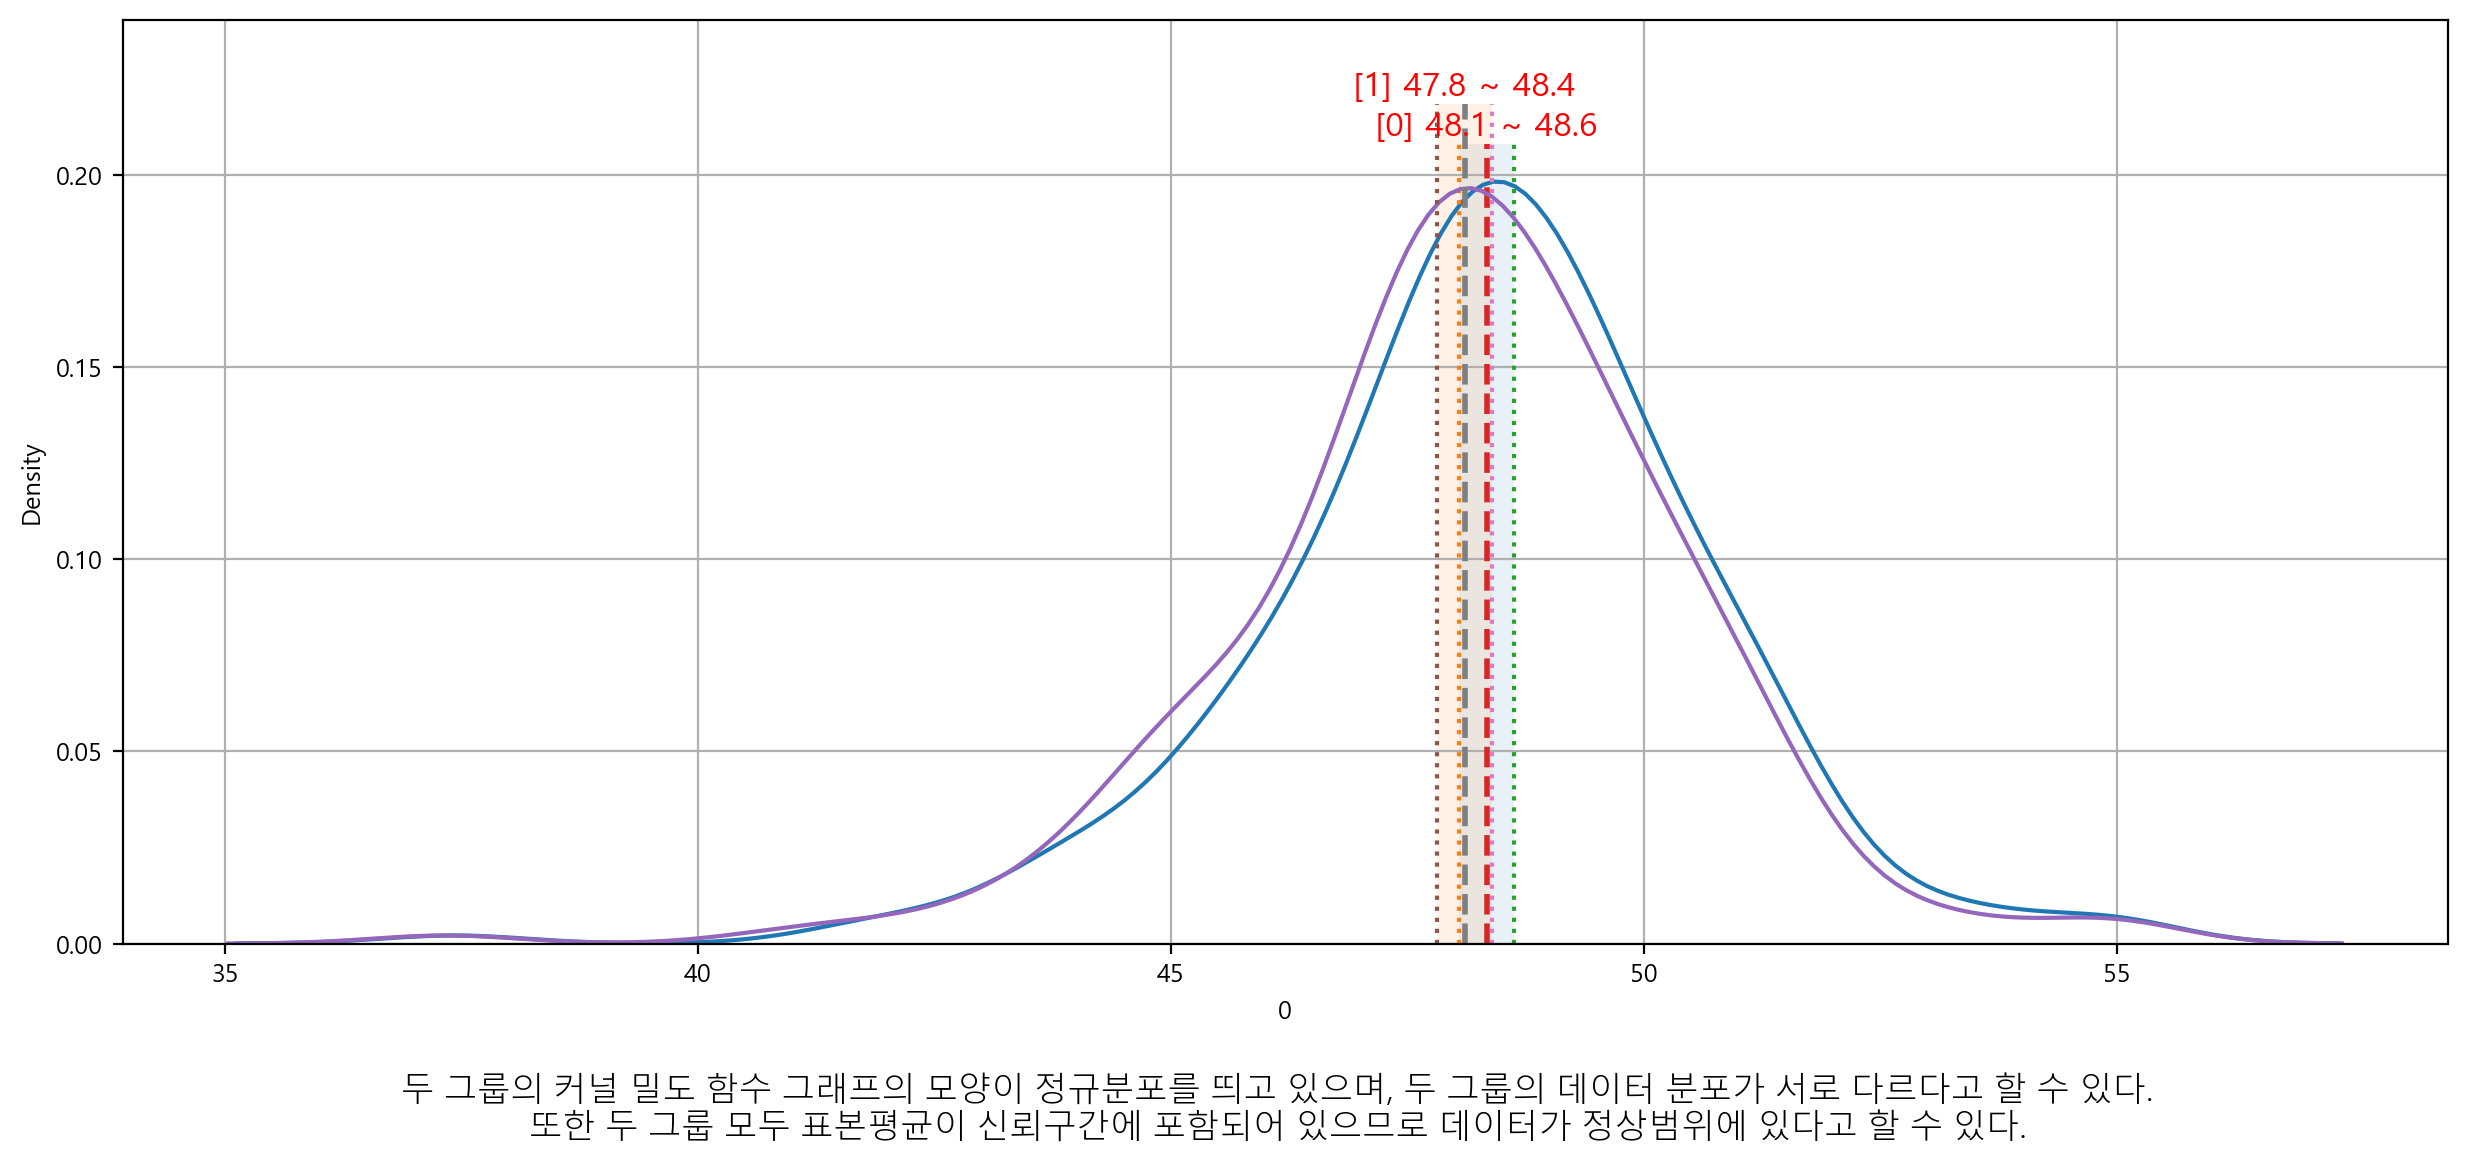

In [151]:
plt.figure()

for c in pivot_df4.columns:
    #print(c)
    
    data = pivot_df4[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [ymin, ymax], linestyle=':')
    plt.plot([cmax, cmax], [ymin, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})
    
txt = """두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.ylim(0, ymax*1.1)
plt.grid()
plt.show()
plt.close()

In [52]:
Q1 = pivot_df1[1].quantile(0.25)
Q3 = pivot_df1[1].quantile(0.75)
iqr = Q3 - Q1
outline_max = Q3 + iqr * 1.5
outline_min = Q1 - iqr * 1.5

pivot_df1.loc[pivot_df1[1] <= outline_min, 1] = np.nan
pivot_df1.loc[pivot_df1[1] >= outline_max, 1] = np.nan
pivot_df1

반기,0,1
code,,
3001491,2.290773,2.197979
3001492,NaN,NaN
3001493,2.453055,2.226292
3001494,3.325555,3.165012
3001495,NaN,3.219557
...,...,...
3130323,0.316911,0.315172
3130324,-0.493146,-0.543375
3130325,-0.953009,-1.009222


In [157]:
from pandas import isna

In [175]:
from sklearn.impute import SimpleImputer
from pandas import DataFrame

In [176]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imr = imr.fit_transform(pivot_df2.values)
fill_df2 = DataFrame(df_imr, index=pivot_df2.index, columns=pivot_df2.columns)
fill_df2

반기,0,1
code,,
3110001,40.616153,40.292214
3110002,45.400839,44.733272
3110003,41.387072,40.951599
3110004,39.603281,39.473426
3110005,41.016525,40.831821
...,...,...
3111086,44.606282,44.220443
3111087,42.222433,41.991101
3111088,43.607411,43.751720


In [184]:
for c in fill_df2.columns:
    s, p = normaltest(fill_df2[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))

[0] statistic: 39.620, p-value: 0.000, 정규성 충족 여부: False
[1] statistic: 591.368, p-value: 0.000, 정규성 충족 여부: False


In [181]:
Q1 = fill_df2[0].quantile(0.25)
Q3 = fill_df2[0].quantile(0.75)
iqr = Q3 - Q1
outline_max = Q3 + iqr * 1.5
outline_min = Q1 - iqr * 1.5

fill_df2.loc[fill_df2[0] <= outline_min, 0] = np.nan
fill_df2.loc[fill_df2[0] >= outline_max, 0] = np.nan
fill_df2

반기,0,1
code,,
3110001,40.616153,40.292214
3110002,45.400839,44.733272
3110003,41.387072,40.951599
3110004,39.603281,39.473426
3110005,41.016525,40.831821
...,...,...
3111086,44.606282,44.220443
3111087,42.222433,41.991101
3111088,43.607411,43.751720


In [183]:
fill_df2.dropna(inplace=True)

In [231]:
normal_dist = False     # 정규성 만족 여부
data = df1.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)
    
print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Levene 검정: statistic: 21.806, p-value: 0.000, 등분산성 충족 여부: False


In [185]:
normal_dist = False     # 정규성 만족 여부
data = fill_df2.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)
    
print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Levene 검정: statistic: 1.904, p-value: 0.168, 등분산성 충족 여부: True


In [216]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import numpy as np
import seaborn as sb
from math import sqrt
from pandas import read_excel, melt
from matplotlib import pyplot as plt
from scipy.stats import t, normaltest, bartlett, levene, ttest_ind, ttest_rel
from statannotations.Annotator import Annotator

In [233]:
s, p = ttest_rel(pivot_df1[0], pivot_df1[1], alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 3.586, p-value: 0.992, 귀무가설 채택'

In [240]:
s, p = ttest_rel(fill_df2[0], fill_df2[1], alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 6.922, p-value: 1.000, 귀무가설 채택'

In [187]:
from pandas import melt

In [189]:
fill_df2.reset_index(inplace=True)

In [244]:
pivot_df2[0].describe()

count    1027.000000
mean       42.372793
std         3.658508
min        11.106820
25%        40.872871
50%        42.900872
75%        44.659247
max        49.067070
Name: 0, dtype: float64

In [192]:
mdf2 = melt(fill_df2, id_vars = ['code'], value_vars=[0, 1], var_name='group', value_name = 'value')
mdf2

,code,group,value
0,3110001,0,40.616153
1,3110002,0,45.400839
2,3110003,0,41.387072
3,3110004,0,39.603281
4,3110005,0,41.016525
...,...,...,...
2003,3111086,1,44.220443
2004,3111087,1,41.991101
2005,3111088,1,43.751720
2006,3111089,1,46.525285


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: t-test paired samples, P_val:7.949e-12 t=6.922e+00


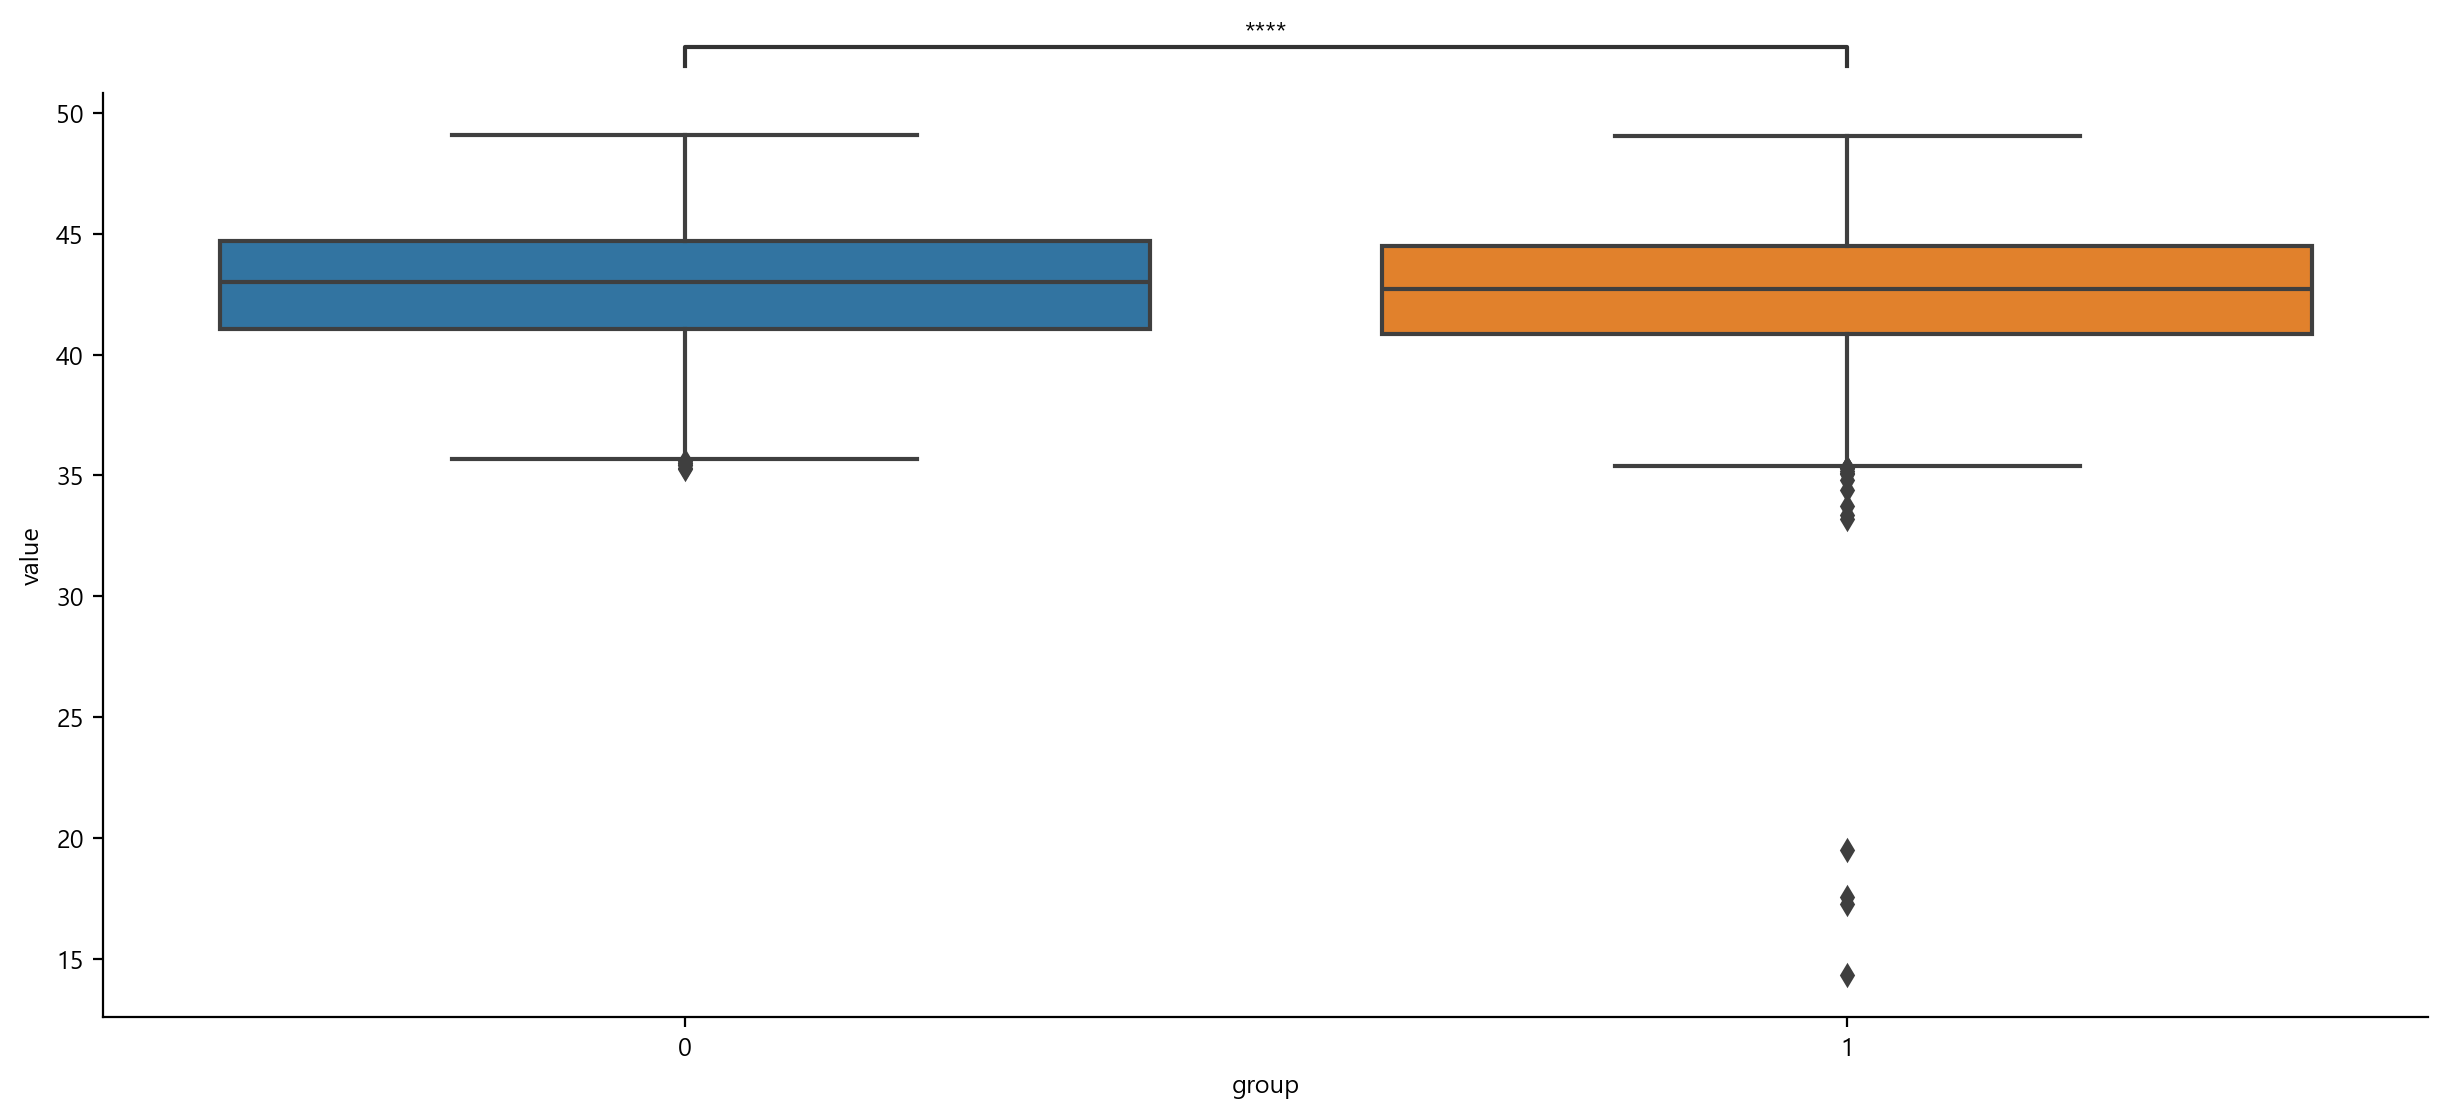

In [236]:
config = {
    "data": mdf2,
    "x": "group",
    "y": "value",
    "pairs": [(0, 1)],
    "test": "t-test_paired", # t-test_ind, t-test_paired, t-test_welch, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
    "text_format": "star", # full, simple, star
    "loc": "outside" # outside, inside
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])
ax.get_xaxis().axis_name

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()

In [195]:
for c in pivot_df3.columns:
    s, p = normaltest(pivot_df3[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p >= 0.05))

[0] statistic: 24.888, p-value: 0.000, 정규성 충족 여부: False
[1] statistic: 24.313, p-value: 0.000, 정규성 충족 여부: False


In [199]:
normal_dist = False     # 정규성 만족 여부
data = pivot_df3.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)
    
print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p >= 0.05))

Levene 검정: statistic: 0.000, p-value: 0.989, 등분산성 충족 여부: True


In [237]:
s, p = ttest_rel(pivot_df3[0], pivot_df3[1], alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 16.907, p-value: 1.000, 귀무가설 채택'

In [206]:
pivot_df3.reset_index(inplace=True)
mdf3 = melt(pivot_df3, id_vars = ['code'], value_vars=[0, 1], var_name='group', value_name = 'value')
mdf3

,code,group,value
0,3120001,0,47.557318
1,3120002,0,47.957730
2,3120003,0,49.919456
3,3120004,0,47.741109
4,3120005,0,47.585099
...,...,...,...
493,3120245,1,48.847785
494,3120246,1,49.258020
495,3120247,1,47.601217
496,3120248,1,48.762067


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: t-test paired samples, P_val:3.548e-43 t=1.691e+01


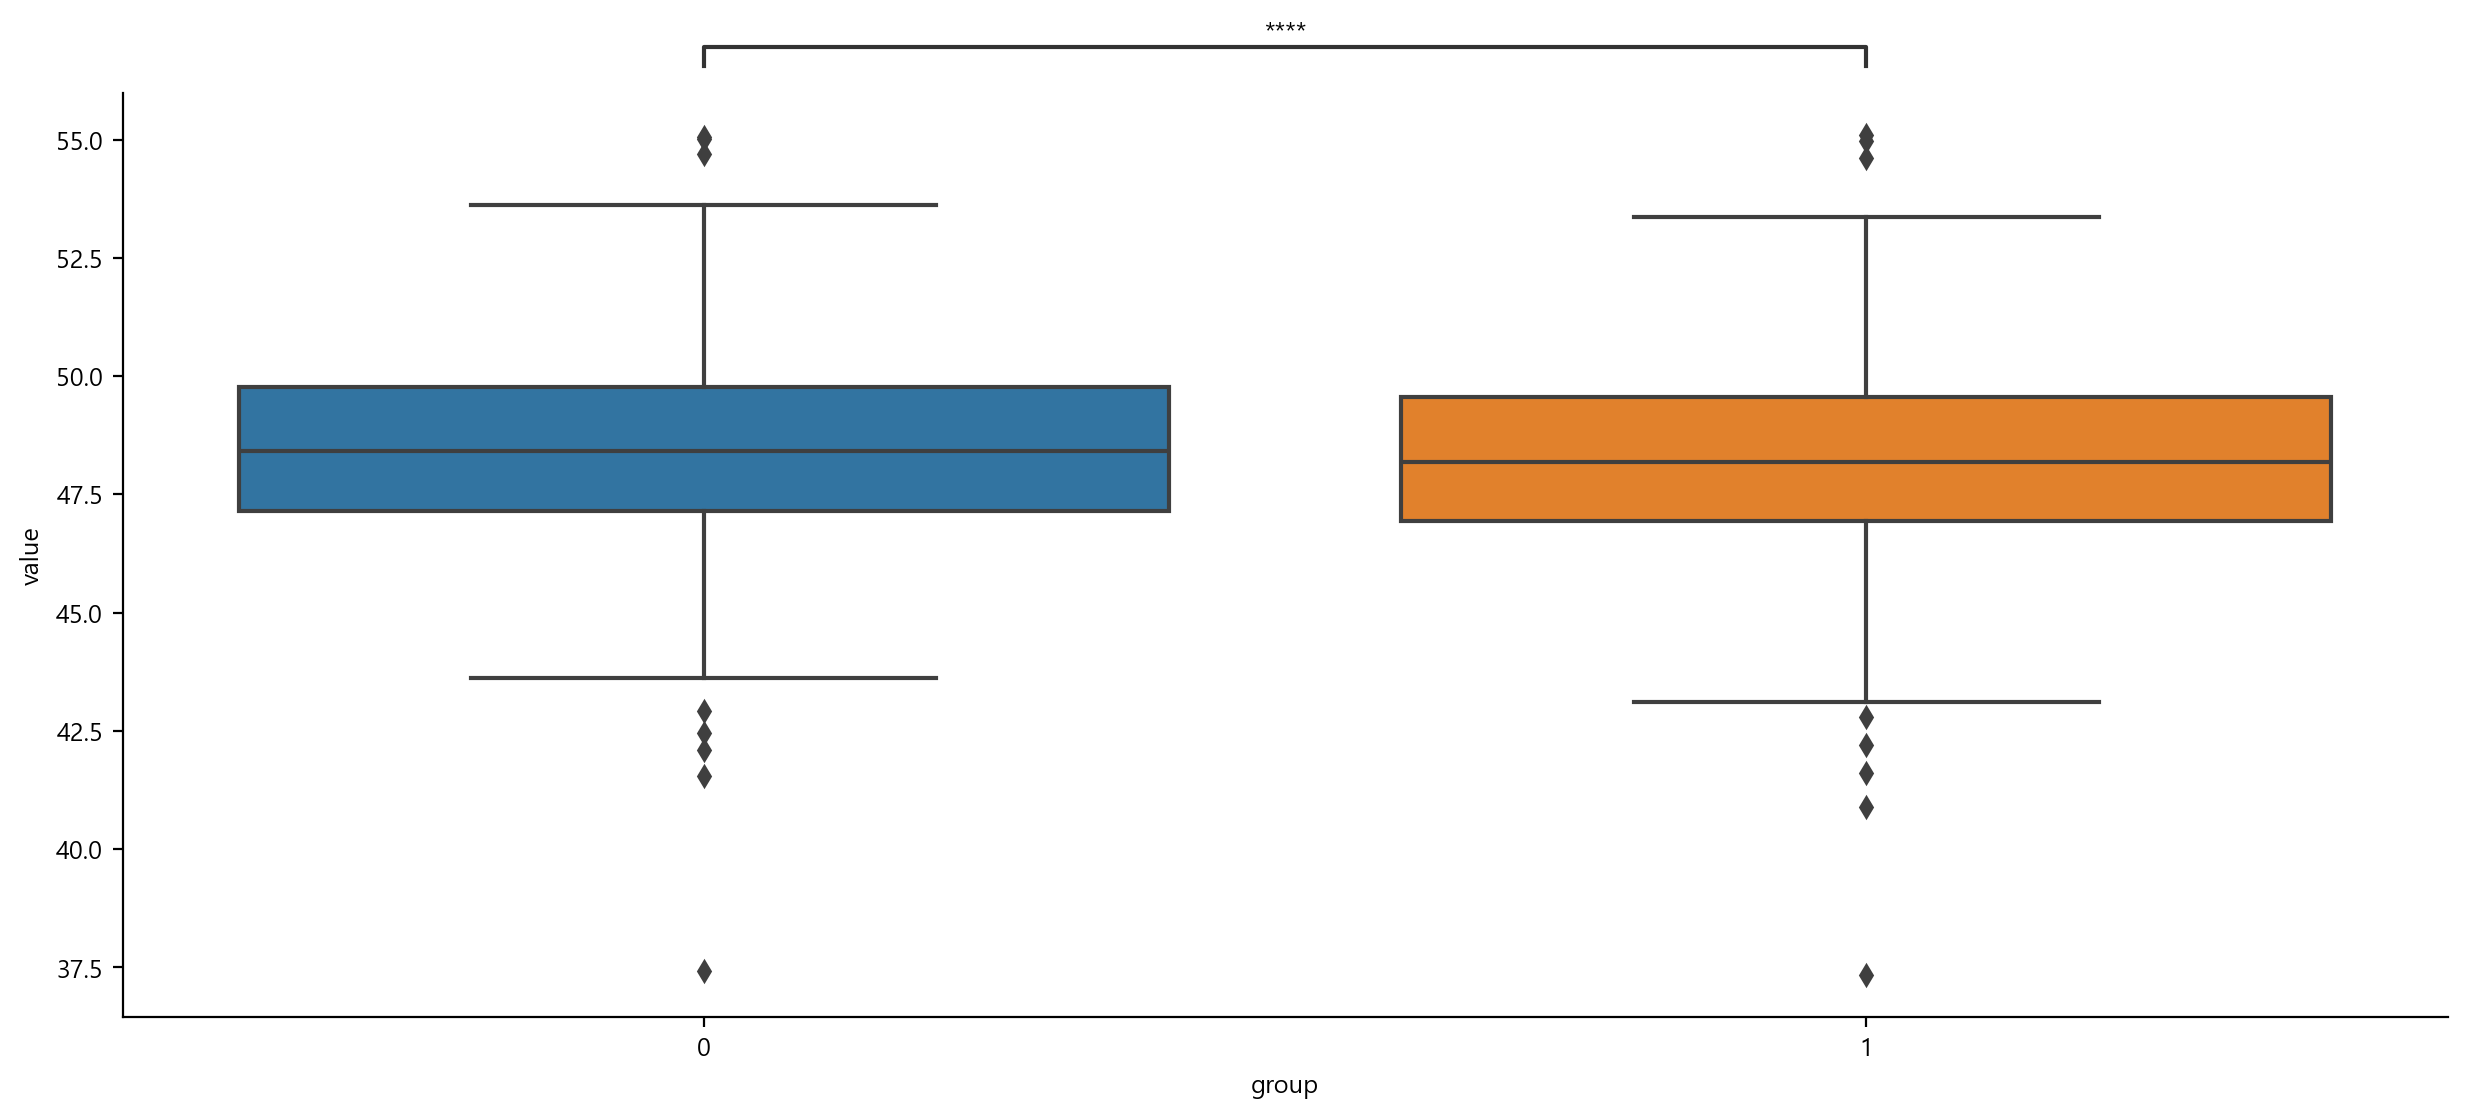

In [209]:
config = {
    "data": mdf3,
    "x": "group",
    "y": "value",
    "pairs": [(0, 1)],
    "test": "t-test_paired", # t-test_ind, t-test_paired, t-test_welch, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
    "text_format": "star", # full, simple, star
    "loc": "outside" # outside, inside
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])
ax.get_xaxis().axis_name

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()

In [238]:
s, p = ttest_rel(pivot_df4[0], pivot_df4[1], alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 16.907, p-value: 1.000, 귀무가설 채택'

In [222]:
pivot_df4.reset_index(inplace=True)
mdf4 = melt(pivot_df4, id_vars = ['code'], value_vars=[0, 1], var_name='group', value_name = 'value')
mdf4

,code,group,value
0,3120001,0,47.557318
1,3120002,0,47.957730
2,3120003,0,49.919456
3,3120004,0,47.741109
4,3120005,0,47.585099
...,...,...,...
493,3120245,1,48.847785
494,3120246,1,49.258020
495,3120247,1,47.601217
496,3120248,1,48.762067


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: t-test paired samples, P_val:3.548e-43 t=1.691e+01


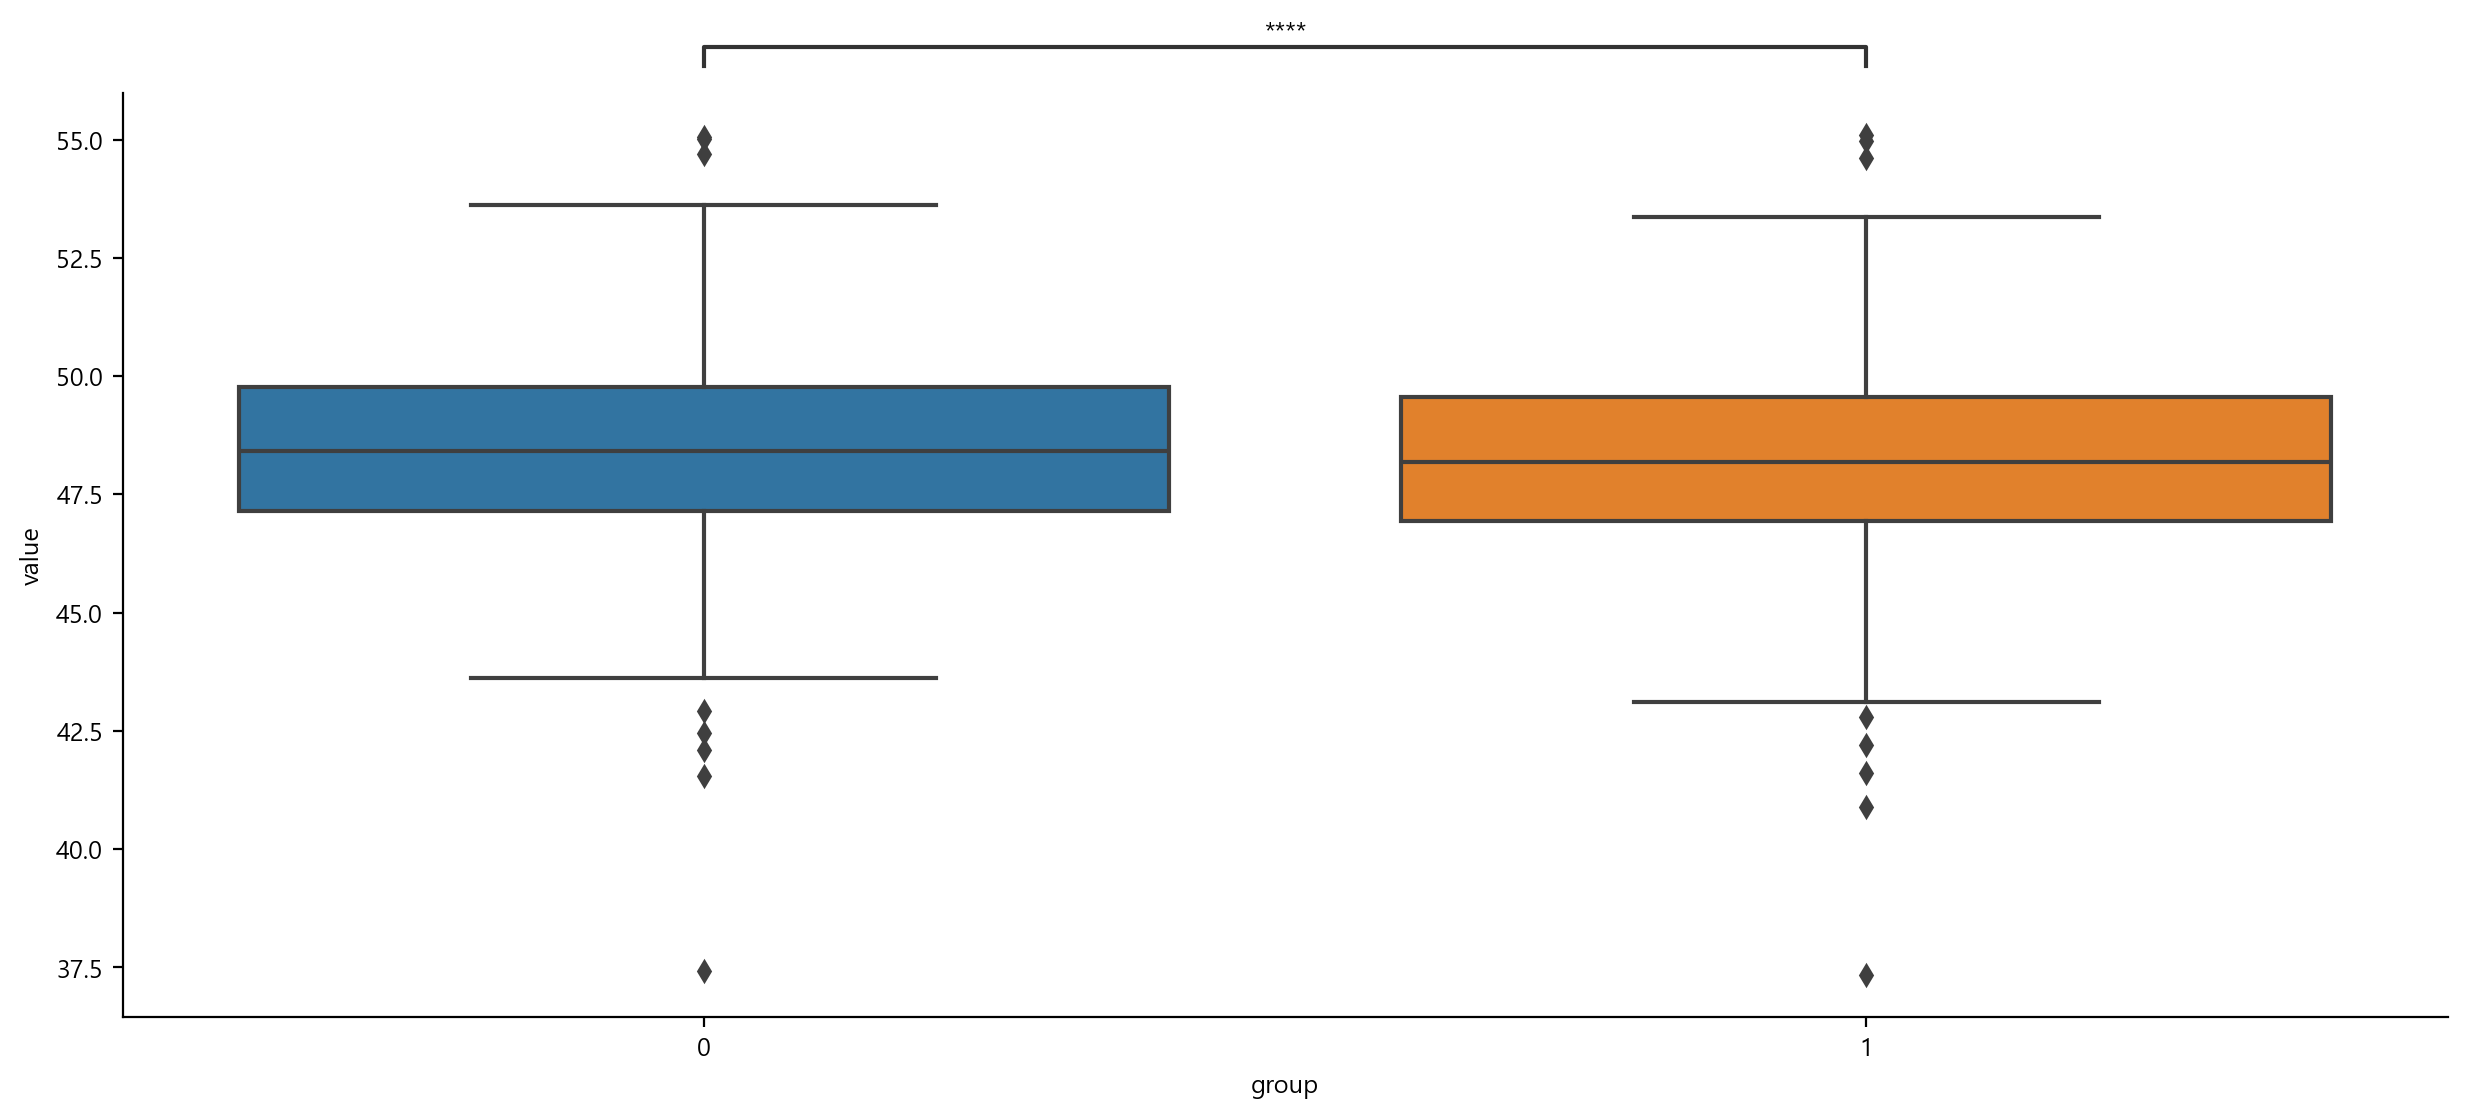

In [223]:
config = {
    "data": mdf4,
    "x": "group",
    "y": "value",
    "pairs": [(0, 1)],
    "test": "t-test_paired", # t-test_ind, t-test_paired, t-test_welch, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
    "text_format": "star", # full, simple, star
    "loc": "outside" # outside, inside
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])
ax.get_xaxis().axis_name

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()

## 문제 7

다음의 데이터는 `Cookie Cats`라는 모바일 게임의 버전에 따른 유저별 총 플레이 시간을 조사한 표 일부이다.

개편 이전 버전을 `A`로 표시하고 개편 후 버전을 `B`로 표시하였다.

게임의 개편이 유저들의 플레이 시간에 어떤 영향을 주었는지 분석하라.

| userid | version | sum_gamerounds |
|--------|---------|----------------|
| 116    | A       | 3              |
| 337    | A       | 38             |
| 377    | B       | 165            |
| 483    | B       | 1              |
| 488    | B       | 179            |

> https://data.hossam.kr/mldata/cookie_cats.xlsx

In [21]:
origin = read_excel("https://data.hossam.kr/mldata/cookie_cats.xlsx")
origin

,userid,version,sum_gamerounds
0,116,A,3
1,337,A,38
2,377,B,165
3,483,B,1
4,488,B,179
...,...,...,...
90184,9999441,B,97
90185,9999479,B,30
90186,9999710,A,28
90187,9999768,B,51


In [55]:
pivot_df = pivot_table(origin, 
                        index = ['userid'],
                        columns = ['version'], 
                       values = 'sum_gamerounds')
pivot_df

version,A,B
userid,,
116,3.0,NaN
337,38.0,NaN
377,NaN,165.0
483,NaN,1.0
488,NaN,179.0
...,...,...
9999441,NaN,97.0
9999479,NaN,30.0
9999710,28.0,NaN


In [22]:
plt.rcParams["font.family"]='Malgun Gothic'
plt.rcParams["font.size"] =12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

> 결측치 대체

In [33]:
from pandas import DataFrame

In [114]:
from sklearn.impute import SimpleImputer


# SimpleImputer 인스턴스 생성
imputer = SimpleImputer(strategy='mean')  # 평균값으로 대체
# 데이터에 적용하여 결측값 대체
imputed_data= imputer.fit_transform(pivot_df)
imputed_df = DataFrame(imputed_data)


In [101]:
imputed_df

,0,1
0,3.000000,51.298776
1,38.000000,51.298776
2,52.456264,165.000000
3,52.456264,1.000000
4,52.456264,179.000000
...,...,...
90184,52.456264,97.000000
90185,52.456264,30.000000
90186,28.000000,51.298776
90187,52.456264,51.000000


In [52]:
lg_imputed_df = np.log(imputed_df)

> 신뢰구간 확인

In [47]:
lg_df = np.log(pivot_df)

posx and posy should be finite values
posx and posy should be finite values


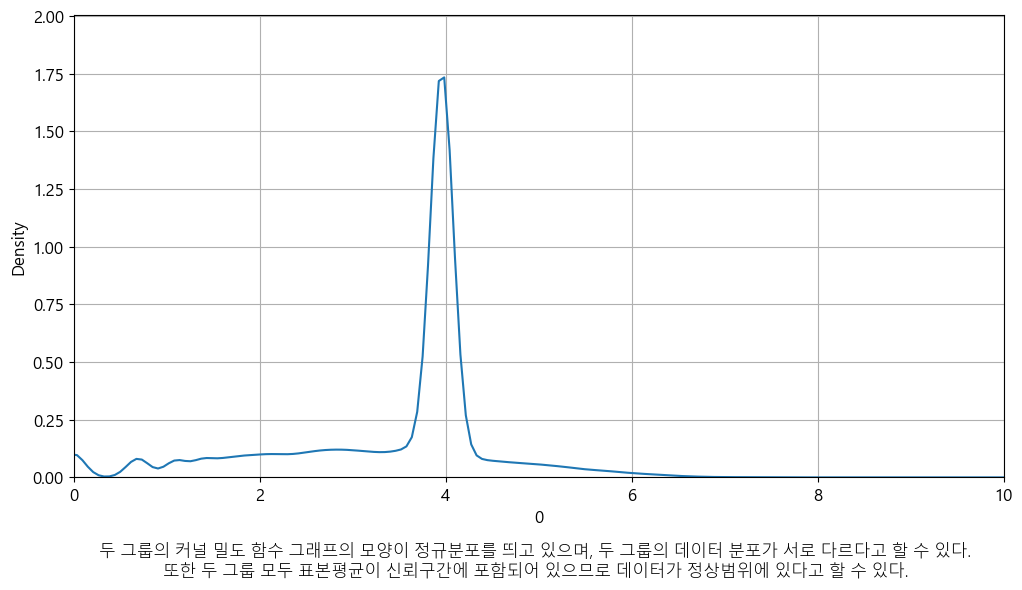

In [65]:
data = lg_imputed_df[0]                                # 데이터만 추출
max = data.max()                                # 최대값
clevel = 0.95                                   # 신뢰수준
dof = len(data) - 1                             # 자유도
sample_mean = data.mean()                       # 표본평균
sample_std = data.std(ddof=1)                   # 표본표준편차
sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

# 신뢰구간
cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

sb.kdeplot(data=data)

xmin, xmax, ymin, ymax = plt.axis()

# 신뢰구간 그리기
plt.plot([cmin, cmin], [ymin, ymax], linestyle=':')
plt.plot([cmax, cmax], [ymin, ymax], linestyle=':')
plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

# 평균 그리기
plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

plt.text(x=(cmax-cmin)/2+cmin,
        y=ymax,
        s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
        horizontalalignment="center",
        verticalalignment="bottom",
        fontdict={"size": 12, "color": "red"})
    
txt = """두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})
plt.xlim(0, 10)
plt.ylim(0, ymax*1.1)
plt.grid()
plt.show()
plt.close()

In [63]:
import seaborn as sb

ModuleNotFoundError: No module named 'pyplot'

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


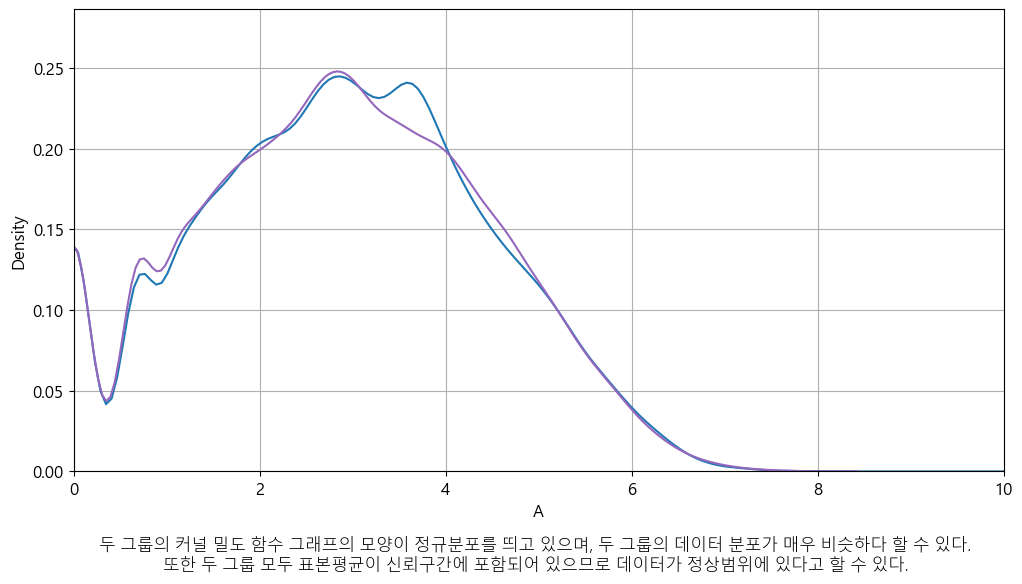

In [68]:
plt.figure()

for c in lg_df.columns:
    #print(c)
    
    data = lg_df[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [ymin, ymax], linestyle=':')
    plt.plot([cmax, cmax], [ymin, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})
    
txt = """두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 매우 비슷하다 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})
plt.xlim(0, 10)
plt.ylim(0, ymax*1.1)
plt.grid()
plt.show()
plt.close()

In [80]:
for c in imputed_df.columns:
    s, p = normaltest(imputed_df[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))

[0] statistic: 460488.231, p-value: 0.000, 정규성 충족 여부: False
[1] statistic: 128669.453, p-value: 0.000, 정규성 충족 여부: False


In [78]:
normal_dist = False      # 정규성 만족 여부
data = imputed_df.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
    
else:
    n = "Levene"
    s, p = levene(*fields)
    
print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Levene 검정: statistic: 0.059, p-value: 0.809, 등분산성 충족 여부: True


In [84]:
s, p = ttest_rel(imputed_df[0], imputed_df[1], alternative='greater')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p < 0.05 else "귀무")

'statistic: 1.782, p-value: 0.037, 대립가설 채택'

In [88]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import seaborn as sb
from math import sqrt
from pandas import read_excel, melt
from matplotlib import pyplot as plt
from scipy.stats import t, normaltest, bartlett, levene, ttest_rel, mannwhitneyu
from statannotations.Annotator import Annotator

In [192]:
Q1 = imputed_df[1].quantile(0.25)
Q3 = imputed_df[1].quantile(0.75)
iqr = Q3 - Q1
outline_max = Q3 + iqr * 1.5
outline_min = Q1 - iqr * 1.5

imputed_df[1].loc[imputed_df[1] <= outline_min] = None
imputed_df[1].loc[imputed_df[1] >= outline_max] = None
imputed_df


,0,1
0,3.000000,51.298776
1,38.000000,51.298776
2,52.456264,0.000000
3,52.456264,1.000000
4,52.456264,0.000000
...,...,...
90184,52.456264,97.000000
90185,52.456264,30.000000
90186,28.000000,51.298776
90187,52.456264,51.000000


In [193]:
Q1 = imputed_df[0].quantile(0.25)
Q3 = imputed_df[0].quantile(0.75)
iqr = Q3 - Q1
outline_max = Q3 + iqr * 1.5
outline_min = Q1 - iqr * 1.5

imputed_df[0].loc[imputed_df[0] <= outline_min] = None
imputed_df[0].loc[imputed_df[0] >= outline_max] = None
imputed_df

,0,1
0,3.000000,51.298776
1,38.000000,51.298776
2,52.456264,0.000000
3,52.456264,1.000000
4,52.456264,0.000000
...,...,...
90184,52.456264,97.000000
90185,52.456264,30.000000
90186,28.000000,51.298776
90187,52.456264,51.000000


In [195]:
mdf = melt(imputed_df, var_name='group', value_name='value')
mdf.dropna(inplace=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: t-test independent samples, P_val:3.594e-18 t=8.692e+00


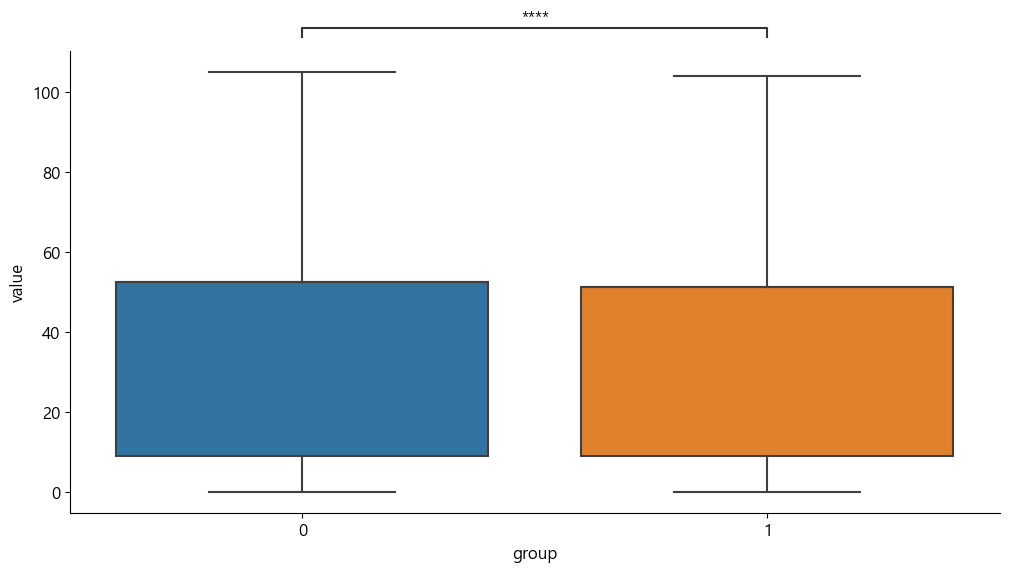

In [196]:
config = {
    "data": mdf,
    "x": "group",
    "y": "value",
    "pairs": [(0, 1)],
    "test": "t-test_ind", # t-test_ind, t-test_paired, t-test_welch, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
    "text_format": "star", # full, simple, star
    "loc": "outside" # outside, inside
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])
ax.get_xaxis().axis_name

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()